## importing Libraries required

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']=''
import numpy as np
import pandas as pd
import cv2
import imutils
from IPython.display import display
from PIL import Image

In [2]:
os.environ['CUDA_VISIBLE_DEVICES']='0'


In [3]:
data = pd.read_csv('../newest.csv')

In [20]:
data.head()

,foot_id,url,l_0_x,l_0_y,l_1_x,l_1_y,l_2_x,l_2_y,l_3_x,l_3_y,...,r_17_v,r_18_v,r_19_v,r_20_v,r_21_v,r_22_v,r_23_v,r_24_v,l_probability,r_probability
0,2649,https://newvalues.s3-us-west-1.amazonaws.com/1...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,True,True,True,False,False,False,False,False,0.0,1.0
1,58,https://newvalues.s3-us-west-1.amazonaws.com/c...,0.048055,0.047930,0.014859,-0.510058,-0.014845,-0.018323,0.099175,-0.025737,...,False,False,False,False,False,False,False,False,1.0,0.0
2,2978,https://newvalues.s3-us-west-1.amazonaws.com/2...,-0.265351,0.384186,-0.196627,-0.656218,-0.403882,0.244417,-0.068591,0.266565,...,True,True,True,True,True,True,False,False,1.0,1.0
3,69,https://newvalues.s3-us-west-1.amazonaws.com/I...,-0.091605,0.272204,-0.121314,-0.158309,-0.170479,0.232533,-0.036883,0.214789,...,True,True,True,True,True,True,True,False,1.0,1.0
4,2438,https://newvalues.s3-us-west-1.amazonaws.com/c...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,True,True,True,False,True,False,True,False,0.0,1.0


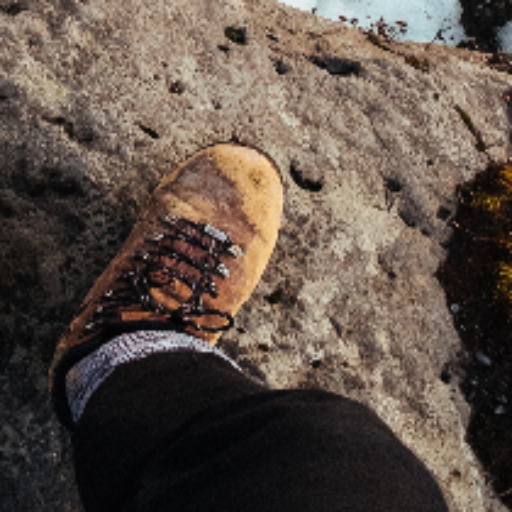

In [31]:
# Visualizing 4th index image 
idx = 4
img_url = data.iloc[idx].url

image = imutils.url_to_image(img_url)

img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

In [6]:
# Extracting just column names for coordinates to be fetched for right and left foot
right_points_x = [i for i in data.columns if 'r_' in i and 'x' in i and 'v' not in i and 'p' not in i]
right_points_y = [i for i in data.columns if 'r_' in i and 'y' in i and 'v' not in i and 'p' not in i]

In [7]:
left_points_x = [i for i in data.columns if 'l_' in i and 'x' in i and 'v' not in i and 'p' not in i]
left_points_y = [i for i in data.columns if 'l_' in i and 'y' in i and 'v' not in i and 'p' not in i]

In [21]:
r_max_x=-99 
r_min_x=100 
r_max_y=-99
r_min_y=100

l_max_x=-99 
l_min_x=100 
l_max_y=-99
l_min_y=100

for i in right_points_x:
    r_max_x = max(r_max_x, data.iloc[idx][i])
    r_min_x = min(r_min_x, data.iloc[idx][i])
    
for i in right_points_y:
    r_max_y = max(r_max_y, data.iloc[idx][i])
    r_min_y = min(r_min_y, data.iloc[idx][i])
    
for i in left_points_x:
    l_max_x = max(l_max_x, data.iloc[idx][i])
    l_min_x = min(l_min_x, data.iloc[idx][i])
    
for i in left_points_y:
    l_max_y = max(l_max_y, data.iloc[idx][i])
    l_min_y = min(l_min_y, data.iloc[idx][i])

In [22]:
[l_max_x, l_min_x, l_max_y, l_min_y] = np.multiply([l_max_x, l_min_x, l_max_y, l_min_y],512)

In [23]:
[r_max_x, r_min_x, r_max_y, r_min_y] = np.multiply([r_max_x, r_min_x, r_max_y, r_min_y],512)

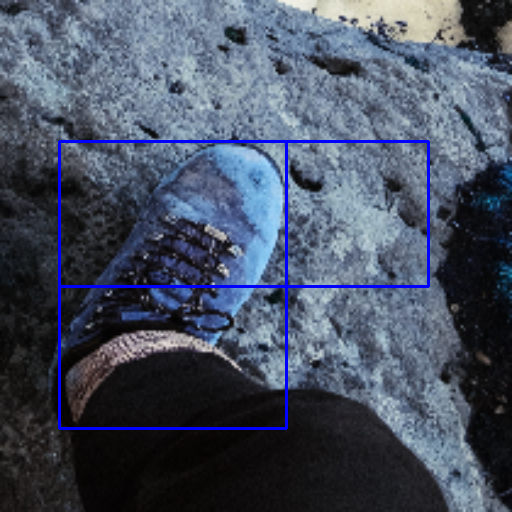

In [29]:
# Thats how right foot looks with bounding boxes
image = cv2.rectangle(image,(int(r_min_x)+256,256-int(r_min_y)),(int(r_max_x)+256,256-int(r_max_y)),(255,0,0), 2)
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

In [28]:
int(r_min_x)+256,256-int(r_min_y),int(r_max_x)+256,256-int(r_max_y)

(59, 428, 286, 141)

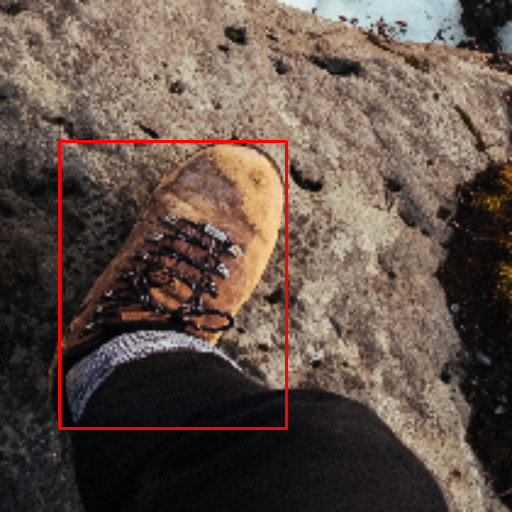

In [33]:
# Thats how left foot looks with bounding boxes
image=img.copy()
image = cv2.rectangle(image,(59,141),(286,428),(255,0,0), 2)
display(Image.fromarray(image))

In [12]:
int(r_min_x)+256, 256-int(r_min_y)

(59, 428)

In [13]:
[l_max_x, l_min_x, l_max_y, l_min_y]

[0.0, 0.0, 0.0, 0.0]

In [ ]:
# Download images from url
# Note: Uncomment to download :)

# import urllib.request 
# for idx,row_obj in data.iterrows():
#     if 'png' in row_obj.url:
#         urllib.request.urlretrieve(row_obj.url, str(row_obj.foot_id) + '.png')
#     elif 'jpg' in row_obj.url:
#         urllib.request.urlretrieve(row_obj.url, str(row_obj.foot_id) + '.jpg')

In [17]:
import os
arr = os.listdir()

In [ ]:
# Converting png to jpg images.
from PIL import Image

for i in arr:
    try:
        im = Image.open(i)
        if '.png' in i:
            im=im.convert('RGB')
            im.save('jpg_images/'+i.replace('.png','')+'.jpg')
            continue
        im.save('jpg_images/'+i)
    except:
        print(i)

In [36]:
# Combining all above for all images to make csv for training pipeline
z='.jpg'
right_points_x = [i for i in data.columns if 'r_' in i and 'x' in i and 'v' not in i and 'p' not in i]
right_points_y = [i for i in data.columns if 'r_' in i and 'y' in i and 'v' not in i and 'p' not in i]
left_points_x = [i for i in data.columns if 'l_' in i and 'x' in i and 'v' not in i and 'p' not in i]
left_points_y = [i for i in data.columns if 'l_' in i and 'y' in i and 'v' not in i and 'p' not in i]

xml_list_lr = []

for idx in range(data.shape[0]):
    if str(data.iloc[idx].foot_id)+z not in arr:
        continue
#     print(idx)
    r_max_x=-99 
    r_min_x=100 
    r_max_y=-99
    r_min_y=100

    l_max_x=-99 
    l_min_x=100 
    l_max_y=-99
    l_min_y=100

    for i in right_points_x:
        r_max_x = max(r_max_x, min(0.48,data.iloc[idx][i]))
        r_min_x = min(r_min_x, max(-0.48,data.iloc[idx][i]))

    for i in right_points_y:
        r_max_y = max(r_max_y, min(0.48,data.iloc[idx][i]))
        r_min_y = min(r_min_y, max(-0.48,data.iloc[idx][i]))

    for i in left_points_x:
        l_max_x = max(l_max_x, min(0.48,data.iloc[idx][i]))
        l_min_x = min(l_min_x, max(-0.48,data.iloc[idx][i]))

    for i in left_points_y:
        l_max_y = max(l_max_y, min(0.48,data.iloc[idx][i]))
        l_min_y = min(l_min_y, max(-0.48,data.iloc[idx][i]))
    
    [l_max_x, l_min_x, l_max_y, l_min_y] = np.multiply([l_max_x, l_min_x, l_max_y, l_min_y],512)
    [r_max_x, r_min_x, r_max_y, r_min_y] = np.multiply([r_max_x, r_min_x, r_max_y, r_min_y],512)
    
    r_min_x = int(r_min_x)+256
    r_min_y = 256-int(r_min_y)
    r_max_x = int(r_max_x)+256
    r_max_y = 256-int(r_max_y)
    
    l_min_x = int(l_min_x)+256
    l_min_y = 256-int(l_min_y)
    l_max_x = int(l_max_x)+256
    l_max_y = 256-int(l_max_y)
    if data.iloc[idx].l_probability==0:
        l_min_x,l_min_y,l_max_x,l_max_y=0,0,0,0
    if data.iloc[idx].r_probability==0:
        r_min_x,r_min_y,r_max_x,r_max_y=0,0,0,0
    
    print('left---->',l_min_x,l_min_y,l_max_x,l_max_y,end="     ")
    print('right---->',r_min_x,r_min_y,r_max_x,r_max_y)
    xml_list_lr.append([str(data.iloc[idx].foot_id)+z,520,520,'left_foot',l_min_x,l_max_y,l_max_x,l_min_y,'right_foot',r_min_x,r_max_y,r_max_x,r_min_y])

left----> 0 0 0 0     right----> 59 331 243 17
left----> 214 501 328 232     right----> 0 0 0 0
left----> 28 501 232 55     right----> 277 501 484 76
left----> 0 0 0 0     right----> 59 428 286 141
left----> 0 0 0 0     right----> 89 501 268 11
left----> 189 294 245 171     right----> 245 388 298 283
left----> 68 501 267 133     right----> 267 501 471 155
left----> 196 461 349 39     right----> 0 0 0 0
left----> 262 407 350 174     right----> 187 420 263 191
left----> 206 424 386 29     right----> 0 0 0 0
left----> 183 467 354 50     right----> 0 0 0 0
left----> 0 0 0 0     right----> 274 302 365 101
left----> 0 0 0 0     right----> 11 379 217 28
left----> 114 501 215 371     right----> 330 501 446 378
left----> 287 329 368 169     right----> 166 381 244 220
left----> 0 0 0 0     right----> 257 501 405 68
left----> 191 452 430 26     right----> 0 0 0 0
left----> 0 0 0 0     right----> 119 499 297 52
left----> 102 501 235 41     right----> 267 501 397 44
left----> 142 501 411 49     rig

left----> 52 501 256 25     right----> 247 501 443 56
left----> 0 0 0 0     right----> 290 454 468 11
left----> 118 480 263 140     right----> 268 501 391 154
left----> 145 269 193 62     right----> 243 291 289 77
left----> 240 329 321 94     right----> 0 0 0 0
left----> 196 349 231 229     right----> 303 328 342 202
left----> 160 485 229 306     right----> 184 301 297 174
left----> 223 404 340 135     right----> 315 424 407 126
left----> 196 471 403 77     right----> 0 0 0 0
left----> 0 0 0 0     right----> 114 501 270 83
left----> 0 0 0 0     right----> 100 444 243 11
left----> 0 0 0 0     right----> 25 421 202 11
left----> 219 472 419 209     right----> 0 0 0 0
left----> 275 473 371 71     right----> 0 0 0 0
left----> 112 498 232 229     right----> 271 501 375 233
left----> 184 401 280 186     right----> 0 0 0 0
left----> 46 431 192 168     right----> 231 371 443 151
left----> 199 501 325 15     right----> 0 0 0 0
left----> 257 476 385 79     right----> 89 431 248 70
left----> 0 0 0

left----> 281 399 386 142     right----> 84 393 198 139
left----> 0 0 0 0     right----> 11 501 182 63
left----> 0 0 0 0     right----> 115 501 366 59
left----> 0 0 0 0     right----> 211 434 270 305
left----> 157 485 250 114     right----> 246 476 336 134
left----> 200 381 346 103     right----> 0 0 0 0
left----> 0 0 0 0     right----> 173 486 401 11
left----> 188 501 332 202     right----> 0 0 0 0
left----> 46 396 186 189     right----> 284 412 449 200
left----> 87 477 207 215     right----> 244 463 359 223
left----> 74 218 362 70     right----> 50 398 367 262
left----> 59 501 237 20     right----> 239 501 412 13
left----> 79 501 269 51     right----> 270 501 462 51
left----> 303 437 466 33     right----> 55 417 215 42
left----> 0 0 0 0     right----> 87 447 201 167
left----> 111 426 262 182     right----> 0 0 0 0
left----> 0 0 0 0     right----> 30 463 230 172
left----> 161 472 237 292     right----> 273 483 351 298
left----> 303 386 386 163     right----> 0 0 0 0
left----> 260 501 

left----> 281 379 423 11     right----> 0 0 0 0
left----> 106 401 165 187     right----> 235 373 287 192
left----> 236 501 389 24     right----> 0 0 0 0
left----> 200 384 304 192     right----> 0 0 0 0
left----> 137 470 424 69     right----> 0 0 0 0
left----> 156 501 355 129     right----> 0 0 0 0
left----> 0 0 0 0     right----> 25 455 286 19
left----> 235 501 335 154     right----> 0 0 0 0
left----> 0 0 0 0     right----> 190 415 303 64
left----> 0 0 0 0     right----> 98 424 211 41
left----> 253 501 479 11     right----> 0 0 0 0
left----> 94 501 329 22     right----> 0 0 0 0
left----> 0 0 0 0     right----> 100 450 218 160
left----> 305 447 407 143     right----> 0 0 0 0
left----> 96 421 236 55     right----> 271 424 407 46
left----> 0 0 0 0     right----> 172 499 350 41
left----> 288 497 481 14     right----> 0 0 0 0
left----> 51 457 310 65     right----> 274 473 501 83
left----> 0 0 0 0     right----> 133 265 270 78
left----> 295 441 410 144     right----> 0 0 0 0
left----> 69 419

left----> 145 336 242 165     right----> 0 0 0 0
left----> 0 0 0 0     right----> 120 455 293 79
left----> 116 501 501 274     right----> 0 0 0 0
left----> 55 501 423 11     right----> 0 0 0 0
left----> 168 248 470 11     right----> 12 484 254 181
left----> 200 470 381 32     right----> 0 0 0 0
left----> 0 0 0 0     right----> 57 465 202 96
left----> 403 364 501 88     right----> 0 0 0 0
left----> 0 0 0 0     right----> 125 411 257 80
left----> 162 197 353 16     right----> 241 285 472 144
left----> 0 0 0 0     right----> 11 460 396 249
left----> 11 407 160 74     right----> 278 403 436 73
left----> 49 501 265 56     right----> 270 501 484 11
left----> 0 0 0 0     right----> 131 501 295 119
left----> 293 501 455 38     right----> 0 0 0 0
left----> 81 395 238 45     right----> 278 367 436 12
left----> 104 472 284 56     right----> 269 431 435 49
left----> 305 407 368 186     right----> 0 0 0 0
left----> 0 0 0 0     right----> 137 480 294 36
left----> 296 382 439 45     right----> 0 0 0 

left----> 229 301 328 183     right----> 158 297 231 166
left----> 274 448 406 58     right----> 0 0 0 0
left----> 234 473 438 101     right----> 0 0 0 0
left----> 0 0 0 0     right----> 236 501 419 11
left----> 0 0 0 0     right----> 95 457 238 81
left----> 186 446 283 269     right----> 280 459 347 257
left----> 0 0 0 0     right----> 88 353 286 41
left----> 97 363 173 306     right----> 128 406 204 339
left----> 112 501 408 11     right----> 0 0 0 0
left----> 44 418 501 81     right----> 0 0 0 0
left----> 56 494 255 111     right----> 276 501 481 122
left----> 314 501 427 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 71 353 293 44
left----> 0 0 0 0     right----> 97 501 321 40
left----> 0 0 0 0     right----> 94 501 254 98
left----> 0 0 0 0     right----> 160 501 424 13
left----> 0 0 0 0     right----> 170 443 360 42
left----> 20 421 344 233     right----> 225 273 501 11
left----> 0 0 0 0     right----> 126 280 231 56
left----> 0 0 0 0     right----> 153 418 310 43
left

left----> 62 346 209 28     right----> 286 479 439 148
left----> 270 458 443 177     right----> 156 497 318 229
left----> 285 425 479 76     right----> 0 0 0 0
left----> 51 501 182 241     right----> 347 501 467 226
left----> 117 479 280 11     right----> 261 469 446 11
left----> 82 456 251 66     right----> 269 473 475 96
left----> 219 470 377 37     right----> 0 0 0 0
left----> 36 501 231 83     right----> 272 501 467 76
left----> 274 371 409 91     right----> 0 0 0 0
left----> 60 269 256 178     right----> 233 361 391 277
left----> 0 0 0 0     right----> 139 481 293 44
left----> 66 501 221 224     right----> 234 501 386 227
left----> 0 0 0 0     right----> 133 497 340 11
left----> 168 501 373 25     right----> 0 0 0 0
left----> 225 495 341 64     right----> 0 0 0 0
left----> 180 329 244 106     right----> 0 0 0 0
left----> 174 501 282 154     right----> 278 490 380 147
left----> 370 488 501 18     right----> 0 0 0 0
left----> 0 0 0 0     right----> 127 487 263 30
left----> 0 0 0 0  

left----> 0 0 0 0     right----> 80 425 245 49
left----> 81 501 297 28     right----> 266 501 461 26
left----> 297 458 463 106     right----> 43 445 204 82
left----> 148 473 353 11     right----> 0 0 0 0
left----> 130 501 218 131     right----> 217 501 312 132
left----> 73 344 203 73     right----> 306 321 434 49
left----> 0 0 0 0     right----> 11 501 439 11
left----> 114 351 245 30     right----> 314 320 444 16
left----> 0 0 0 0     right----> 132 483 294 90
left----> 118 459 242 230     right----> 262 446 396 228
left----> 0 0 0 0     right----> 114 501 301 155
left----> 11 501 226 76     right----> 304 501 501 83
left----> 86 372 181 73     right----> 0 0 0 0
left----> 0 0 0 0     right----> 133 436 270 145
left----> 20 501 167 311     right----> 256 501 435 284
left----> 96 466 277 13     right----> 263 484 442 11
left----> 0 0 0 0     right----> 91 496 305 113
left----> 17 455 222 157     right----> 223 464 428 146
left----> 0 0 0 0     right----> 105 403 332 50
left----> 229 359

left----> 44 261 278 125     right----> 43 400 286 272
left----> 0 0 0 0     right----> 118 501 273 85
left----> 92 423 214 196     right----> 251 403 382 190
left----> 311 436 424 164     right----> 0 0 0 0
left----> 265 496 444 11     right----> 0 0 0 0
left----> 28 501 250 50     right----> 244 501 482 57
left----> 0 0 0 0     right----> 62 452 173 70
left----> 0 0 0 0     right----> 163 281 247 87
left----> 92 415 264 38     right----> 270 501 439 183
left----> 0 0 0 0     right----> 148 395 324 65
left----> 165 240 257 53     right----> 270 247 367 45
left----> 120 499 234 86     right----> 249 497 393 88
left----> 149 499 292 197     right----> 289 499 419 202
left----> 145 323 262 52     right----> 259 342 374 51
left----> 315 469 420 154     right----> 0 0 0 0
left----> 249 501 371 133     right----> 0 0 0 0
left----> 0 0 0 0     right----> 119 501 324 93
left----> 0 0 0 0     right----> 133 431 331 56
left----> 168 501 339 165     right----> 0 0 0 0
left----> 118 446 328 89   

left----> 59 501 255 61     right----> 248 501 445 68
left----> 204 454 470 18     right----> 0 0 0 0
left----> 165 501 380 73     right----> 0 0 0 0
left----> 90 501 233 154     right----> 334 501 490 143
left----> 49 461 246 11     right----> 280 501 460 90
left----> 125 501 368 11     right----> 0 0 0 0
left----> 85 415 237 59     right----> 292 445 453 73
left----> 207 488 324 64     right----> 0 0 0 0
left----> 0 0 0 0     right----> 97 407 263 108
left----> 152 501 211 291     right----> 286 501 347 280
left----> 0 0 0 0     right----> 11 501 176 15
left----> 0 0 0 0     right----> 138 411 243 57
left----> 69 501 204 175     right----> 334 501 474 112
left----> 16 501 210 88     right----> 324 501 495 91
left----> 32 398 260 180     right----> 255 357 417 165
left----> 0 0 0 0     right----> 11 451 144 24
left----> 0 0 0 0     right----> 144 501 287 11
left----> 0 0 0 0     right----> 200 476 368 49
left----> 150 391 255 93     right----> 293 412 388 114
left----> 100 433 235 250

left----> 97 501 388 161     right----> 0 0 0 0
left----> 0 0 0 0     right----> 169 501 262 21
left----> 174 278 254 126     right----> 261 276 349 123
left----> 129 501 297 183     right----> 254 501 400 132
left----> 192 426 341 48     right----> 0 0 0 0
left----> 69 501 285 94     right----> 271 501 450 112
left----> 293 478 387 254     right----> 109 244 190 68
left----> 220 501 356 38     right----> 0 0 0 0
left----> 0 0 0 0     right----> 87 346 214 24
left----> 158 501 400 11     right----> 0 0 0 0
left----> 351 322 501 11     right----> 0 0 0 0
left----> 119 410 280 40     right----> 0 0 0 0
left----> 109 501 372 100     right----> 0 0 0 0
left----> 160 501 383 67     right----> 0 0 0 0
left----> 130 437 195 248     right----> 271 409 358 235
left----> 0 0 0 0     right----> 145 450 288 11
left----> 188 399 254 173     right----> 320 393 379 170
left----> 163 487 286 66     right----> 285 461 410 73
left----> 143 406 226 110     right----> 222 415 304 100
left----> 319 443 426

left----> 0 0 0 0     right----> 184 382 365 28
left----> 0 0 0 0     right----> 11 440 268 26
left----> 94 391 204 189     right----> 358 282 448 64
left----> 0 0 0 0     right----> 250 473 406 105
left----> 0 0 0 0     right----> 142 412 312 32
left----> 331 328 417 154     right----> 0 0 0 0
left----> 15 501 245 134     right----> 301 501 496 105
left----> 112 436 258 42     right----> 260 434 403 36
left----> 191 469 360 54     right----> 0 0 0 0
left----> 111 418 257 76     right----> 248 423 390 58
left----> 118 384 245 61     right----> 269 399 401 77
left----> 221 440 382 11     right----> 0 0 0 0
left----> 51 501 262 87     right----> 261 501 472 74
left----> 101 501 268 120     right----> 272 501 435 100
left----> 87 501 175 248     right----> 335 473 436 237
left----> 49 501 262 13     right----> 252 501 453 12
left----> 134 431 267 127     right----> 277 442 402 137
left----> 0 0 0 0     right----> 46 340 169 27
left----> 186 468 349 66     right----> 0 0 0 0
left----> 0 0 

left----> 54 431 150 233     right----> 359 445 452 241
left----> 59 501 283 24     right----> 286 501 485 23
left----> 125 501 369 11     right----> 0 0 0 0
left----> 106 444 259 56     right----> 276 461 429 57
left----> 11 501 145 206     right----> 360 501 501 193
left----> 332 442 473 89     right----> 0 0 0 0
left----> 44 395 468 68     right----> 0 0 0 0
left----> 0 0 0 0     right----> 45 427 214 11
left----> 118 423 282 24     right----> 287 397 458 24
left----> 0 0 0 0     right----> 77 501 377 162
left----> 0 0 0 0     right----> 160 391 330 93
left----> 0 0 0 0     right----> 71 501 262 143
left----> 0 0 0 0     right----> 135 352 268 37
left----> 20 501 211 66     right----> 298 501 494 107
left----> 72 501 258 41     right----> 254 501 447 40
left----> 164 294 238 108     right----> 239 296 314 112
left----> 138 501 441 15     right----> 256 256 256 256
left----> 281 501 481 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 103 501 301 98
left----> 0 0 0 0     ri

left----> 0 0 0 0     right----> 70 501 274 11
left----> 40 427 213 11     right----> 287 461 454 31
left----> 316 410 492 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 198 453 364 23
left----> 92 501 225 244     right----> 304 501 454 250
left----> 120 501 331 38     right----> 0 0 0 0
left----> 54 456 202 54     right----> 298 453 451 52
left----> 125 323 264 49     right----> 268 357 395 48
left----> 141 500 377 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 73 479 302 91
left----> 0 0 0 0     right----> 37 500 234 11
left----> 193 464 444 21     right----> 0 0 0 0
left----> 177 473 363 24     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 501 460 13
left----> 11 501 229 35     right----> 283 501 501 32
left----> 0 0 0 0     right----> 184 457 338 74
left----> 12 498 227 42     right----> 315 485 501 30
left----> 47 501 261 18     right----> 258 501 471 11
left----> 114 424 260 49     right----> 256 429 391 56
left----> 106 461 275 36     right----> 

left----> 140 457 482 15     right----> 0 0 0 0
left----> 0 0 0 0     right----> 80 473 354 11
left----> 96 483 223 167     right----> 274 325 395 11
left----> 80 501 228 82     right----> 286 501 432 80
left----> 0 0 0 0     right----> 289 501 501 15
left----> 0 0 0 0     right----> 20 501 361 11
left----> 114 412 301 20     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 501 228 17
left----> 42 481 240 11     right----> 11 501 130 112
left----> 319 497 494 11     right----> 0 0 0 0
left----> 20 425 271 95     right----> 310 466 499 125
left----> 0 0 0 0     right----> 11 483 213 26
left----> 208 466 481 16     right----> 0 0 0 0
left----> 0 0 0 0     right----> 58 487 423 42
left----> 0 0 0 0     right----> 18 501 294 11
left----> 0 0 0 0     right----> 11 482 256 11
left----> 155 501 430 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 76 501 318 11
left----> 0 0 0 0     right----> 60 386 419 56
left----> 192 501 424 11     right----> 0 0 0 0
left----> 0 0 0 0     r

left----> 287 388 397 91     right----> 163 369 267 90
left----> 0 0 0 0     right----> 195 373 388 12
left----> 135 467 223 255     right----> 277 498 368 262
left----> 68 381 179 21     right----> 337 398 472 15
left----> 377 501 501 262     right----> 0 0 0 0
left----> 0 0 0 0     right----> 22 440 249 11
left----> 0 0 0 0     right----> 45 365 236 27
left----> 135 253 215 48     right----> 253 319 362 147
left----> 0 0 0 0     right----> 163 385 348 31
left----> 314 383 448 74     right----> 0 0 0 0
left----> 322 312 394 177     right----> 0 0 0 0
left----> 120 415 240 161     right----> 0 0 0 0
left----> 120 476 212 253     right----> 292 487 383 245
left----> 0 0 0 0     right----> 79 359 189 121
left----> 62 378 181 125     right----> 348 269 444 39
left----> 0 0 0 0     right----> 274 501 489 17
left----> 217 420 281 256     right----> 312 381 377 228
left----> 182 379 376 24     right----> 0 0 0 0
left----> 303 449 496 13     right----> 0 0 0 0
left----> 97 383 214 155     rig

left----> 317 463 492 250     right----> 30 428 224 162
left----> 234 469 437 23     right----> 0 0 0 0
left----> 0 0 0 0     right----> 100 380 219 100
left----> 234 422 439 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 263 410 438 77
left----> 256 501 437 248     right----> 0 0 0 0
left----> 113 499 228 249     right----> 254 501 361 252
left----> 0 0 0 0     right----> 24 398 99 167
left----> 250 390 444 24     right----> 0 0 0 0
left----> 233 398 284 267     right----> 308 400 359 266
left----> 164 501 425 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 23 430 201 11
left----> 0 0 0 0     right----> 43 501 160 213
left----> 423 374 469 277     right----> 0 0 0 0
left----> 0 0 0 0     right----> 96 381 224 66
left----> 0 0 0 0     right----> 13 380 85 200
left----> 335 486 467 192     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 314 118 36
left----> 30 501 106 344     right----> 151 501 229 332
left----> 0 0 0 0     right----> 11 501 372 11
left----

left----> 0 0 0 0     right----> 70 501 286 58
left----> 0 0 0 0     right----> 16 501 285 13
left----> 0 0 0 0     right----> 59 323 218 90
left----> 0 0 0 0     right----> 61 501 426 11
left----> 0 0 0 0     right----> 140 501 393 12
left----> 264 323 484 42     right----> 0 0 0 0
left----> 359 501 492 314     right----> 0 0 0 0
left----> 112 422 256 102     right----> 275 398 417 104
left----> 121 325 263 46     right----> 265 314 419 31
left----> 49 465 486 24     right----> 0 0 0 0
left----> 122 363 188 208     right----> 0 0 0 0
left----> 0 0 0 0     right----> 144 365 277 91
left----> 242 349 366 32     right----> 0 0 0 0
left----> 0 0 0 0     right----> 220 496 405 199
left----> 0 0 0 0     right----> 52 248 129 34
left----> 0 0 0 0     right----> 228 483 452 97
left----> 0 0 0 0     right----> 159 501 414 16
left----> 0 0 0 0     right----> 62 461 152 273
left----> 105 384 191 174     right----> 288 369 377 165
left----> 0 0 0 0     right----> 187 430 389 55
left----> 0 0 0 0 

left----> 221 501 501 38     right----> 0 0 0 0
left----> 143 501 375 14     right----> 0 0 0 0
left----> 0 0 0 0     right----> 25 250 181 23
left----> 0 0 0 0     right----> 11 395 137 73
left----> 0 0 0 0     right----> 45 249 141 29
left----> 366 381 423 246     right----> 0 0 0 0
left----> 175 343 259 136     right----> 269 388 359 144
left----> 118 413 256 112     right----> 248 404 380 124
left----> 53 385 111 253     right----> 400 411 464 268
left----> 173 384 244 229     right----> 271 382 339 236
left----> 187 354 245 220     right----> 247 354 306 222
left----> 0 0 0 0     right----> 45 274 128 94
left----> 174 481 382 60     right----> 0 0 0 0
left----> 350 360 470 28     right----> 0 0 0 0
left----> 0 0 0 0     right----> 75 501 223 78
left----> 41 440 191 196     right----> 278 378 433 156
left----> 82 501 175 308     right----> 210 501 301 318
left----> 263 501 501 16     right----> 0 0 0 0
left----> 0 0 0 0     right----> 23 436 356 19
left----> 47 501 284 17     right

left----> 47 349 143 118     right----> 0 0 0 0
left----> 190 433 363 16     right----> 0 0 0 0
left----> 0 0 0 0     right----> 295 501 419 272
left----> 121 250 260 11     right----> 202 305 448 141
left----> 428 347 500 167     right----> 0 0 0 0
left----> 0 0 0 0     right----> 85 469 309 18
left----> 0 0 0 0     right----> 189 391 385 33
left----> 0 0 0 0     right----> 187 501 436 58
left----> 59 416 241 56     right----> 267 442 443 55
left----> 0 0 0 0     right----> 104 501 211 296
left----> 50 371 238 53     right----> 260 351 480 54
left----> 233 492 454 27     right----> 0 0 0 0
left----> 0 0 0 0     right----> 116 362 312 125
left----> 0 0 0 0     right----> 136 472 357 37
left----> 353 475 501 166     right----> 0 0 0 0
left----> 11 501 257 38     right----> 234 501 501 94
left----> 150 379 265 61     right----> 259 362 432 44
left----> 319 501 436 305     right----> 0 0 0 0
left----> 63 421 261 11     right----> 252 452 417 42
left----> 172 369 244 215     right----> 316

left----> 233 403 420 34     right----> 0 0 0 0
left----> 204 501 475 13     right----> 0 0 0 0
left----> 20 501 262 35     right----> 256 501 501 32
left----> 77 340 184 109     right----> 328 370 436 115
left----> 13 501 428 14     right----> 0 0 0 0
left----> 277 460 406 255     right----> 0 0 0 0
left----> 92 424 201 156     right----> 319 421 424 147
left----> 274 398 393 104     right----> 0 0 0 0
left----> 11 437 228 11     right----> 293 482 498 11
left----> 103 377 264 47     right----> 217 337 366 13
left----> 224 376 397 79     right----> 0 0 0 0
left----> 331 209 451 14     right----> 0 0 0 0
left----> 0 0 0 0     right----> 24 338 160 23
left----> 188 416 252 254     right----> 269 416 339 250
left----> 73 397 271 50     right----> 253 388 427 34
left----> 0 0 0 0     right----> 116 341 279 11
left----> 0 0 0 0     right----> 163 309 320 117
left----> 277 497 494 11     right----> 0 0 0 0
left----> 322 374 472 26     right----> 0 0 0 0
left----> 81 471 176 283     right---

left----> 120 474 186 364     right----> 221 467 287 353
left----> 353 418 501 38     right----> 0 0 0 0
left----> 112 352 253 72     right----> 276 343 414 71
left----> 0 0 0 0     right----> 11 501 227 11
left----> 371 501 452 291     right----> 0 0 0 0
left----> 195 376 386 33     right----> 0 0 0 0
left----> 153 380 324 126     right----> 336 358 474 65
left----> 0 0 0 0     right----> 11 392 105 152
left----> 0 0 0 0     right----> 39 439 145 225
left----> 46 404 280 19     right----> 260 431 493 15
left----> 132 448 206 294     right----> 264 449 328 288
left----> 162 324 260 84     right----> 275 349 379 81
left----> 0 0 0 0     right----> 290 501 465 154
left----> 0 0 0 0     right----> 44 301 204 21
left----> 0 0 0 0     right----> 73 497 380 20
left----> 330 467 501 114     right----> 0 0 0 0
left----> 391 263 491 37     right----> 0 0 0 0
left----> 0 0 0 0     right----> 65 501 334 12
left----> 174 422 357 44     right----> 0 0 0 0
left----> 80 501 268 150     right----> 269

left----> 131 501 398 11     right----> 0 0 0 0
left----> 12 467 241 115     right----> 281 472 492 126
left----> 0 0 0 0     right----> 55 501 293 19
left----> 313 200 370 101     right----> 370 196 428 102
left----> 76 434 265 25     right----> 267 419 424 21
left----> 0 0 0 0     right----> 213 501 376 164
left----> 11 402 248 219     right----> 0 0 0 0
left----> 40 487 157 280     right----> 203 501 314 311
left----> 95 437 240 173     right----> 266 444 391 181
left----> 247 286 381 32     right----> 0 0 0 0
left----> 0 0 0 0     right----> 95 374 233 152
left----> 155 475 314 90     right----> 0 0 0 0
left----> 133 427 211 291     right----> 229 421 313 293
left----> 184 476 249 328     right----> 287 290 360 119
left----> 89 403 226 90     right----> 315 364 434 99
left----> 77 395 223 117     right----> 0 0 0 0
left----> 0 0 0 0     right----> 45 242 205 14
left----> 35 350 237 112     right----> 0 0 0 0
left----> 0 0 0 0     right----> 66 410 235 58
left----> 129 417 267 100  

left----> 102 331 248 77     right----> 236 331 370 69
left----> 0 0 0 0     right----> 355 331 456 106
left----> 11 358 192 56     right----> 200 394 373 90
left----> 0 0 0 0     right----> 118 404 501 19
left----> 11 501 328 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 146 464 290 255
left----> 267 328 463 55     right----> 0 0 0 0
left----> 214 501 407 143     right----> 0 0 0 0
left----> 266 501 495 62     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 501 211 46
left----> 107 501 355 11     right----> 0 0 0 0
left----> 71 317 175 113     right----> 306 331 437 120
left----> 0 0 0 0     right----> 40 501 235 39
left----> 0 0 0 0     right----> 102 424 241 111
left----> 0 0 0 0     right----> 117 475 299 49
left----> 422 323 501 120     right----> 0 0 0 0
left----> 330 468 419 333     right----> 383 492 474 348
left----> 90 345 229 49     right----> 217 380 372 52
left----> 86 501 385 11     right----> 0 0 0 0
left----> 11 501 226 94     right----> 297 501 501 

left----> 152 498 225 351     right----> 323 497 384 351
left----> 81 483 167 325     right----> 258 470 333 315
left----> 0 0 0 0     right----> 108 274 244 18
left----> 55 501 245 56     right----> 240 501 415 62
left----> 0 0 0 0     right----> 352 501 479 271
left----> 128 495 215 306     right----> 0 0 0 0
left----> 11 347 119 109     right----> 108 381 222 107
left----> 397 469 501 205     right----> 0 0 0 0
left----> 405 453 501 232     right----> 0 0 0 0
left----> 196 316 248 208     right----> 270 298 329 192
left----> 179 501 348 187     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 470 146 70
left----> 95 479 196 229     right----> 235 476 340 207
left----> 197 424 306 188     right----> 355 284 496 41
left----> 192 243 258 13     right----> 276 237 357 12
left----> 213 411 257 300     right----> 256 402 297 299
left----> 0 0 0 0     right----> 286 493 441 22
left----> 129 501 234 197     right----> 230 501 347 196
left----> 87 374 208 170     right----> 304 362 414

left----> 263 466 448 27     right----> 0 0 0 0
left----> 294 469 423 210     right----> 0 0 0 0
left----> 150 326 218 147     right----> 294 324 362 146
left----> 105 371 347 27     right----> 0 0 0 0
left----> 0 0 0 0     right----> 202 501 443 12
left----> 345 362 431 158     right----> 0 0 0 0
left----> 214 385 364 47     right----> 0 0 0 0
left----> 0 0 0 0     right----> 262 458 458 98
left----> 0 0 0 0     right----> 82 501 370 22
left----> 173 350 319 86     right----> 0 0 0 0
left----> 0 0 0 0     right----> 29 501 374 25
left----> 196 446 309 129     right----> 0 0 0 0
left----> 0 0 0 0     right----> 213 407 373 105
left----> 0 0 0 0     right----> 73 382 283 27
left----> 107 501 248 252     right----> 287 501 415 243
left----> 154 231 227 67     right----> 0 0 0 0
left----> 0 0 0 0     right----> 111 451 240 131
left----> 387 341 501 53     right----> 0 0 0 0
left----> 163 359 358 73     right----> 322 326 470 27
left----> 195 379 246 253     right----> 258 376 306 250
left

left----> 305 501 495 172     right----> 0 0 0 0
left----> 180 501 494 11     right----> 0 0 0 0
left----> 94 501 326 22     right----> 0 0 0 0
left----> 164 470 223 319     right----> 293 466 361 315
left----> 260 496 419 87     right----> 0 0 0 0
left----> 161 501 471 11     right----> 0 0 0 0
left----> 236 471 391 79     right----> 0 0 0 0
left----> 108 449 285 91     right----> 324 461 491 106
left----> 11 501 501 28     right----> 0 0 0 0
left----> 171 445 418 49     right----> 0 0 0 0
left----> 351 373 457 128     right----> 0 0 0 0
left----> 128 425 314 41     right----> 0 0 0 0
left----> 0 0 0 0     right----> 105 484 309 232
left----> 150 408 346 53     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 467 415 90
left----> 71 501 240 205     right----> 260 501 432 199
left----> 51 417 174 204     right----> 391 406 484 173
left----> 193 320 297 44     right----> 289 417 392 155
left----> 193 403 251 263     right----> 269 445 326 308
left----> 17 352 148 66     right---->

left----> 15 501 226 47     right----> 235 501 476 62
left----> 0 0 0 0     right----> 305 373 501 30
left----> 73 298 241 92     right----> 289 306 457 105
left----> 0 0 0 0     right----> 113 335 269 65
left----> 0 0 0 0     right----> 134 479 342 15
left----> 76 448 243 11     right----> 270 443 437 11
left----> 392 356 501 83     right----> 0 0 0 0
left----> 0 0 0 0     right----> 167 413 261 255
left----> 0 0 0 0     right----> 90 466 345 20
left----> 282 422 455 11     right----> 0 0 0 0
left----> 106 346 282 22     right----> 0 0 0 0
left----> 11 388 160 30     right----> 0 0 0 0
left----> 264 501 398 278     right----> 0 0 0 0
left----> 0 0 0 0     right----> 31 376 256 22
left----> 11 425 166 109     right----> 331 402 487 65
left----> 0 0 0 0     right----> 25 439 149 198
left----> 0 0 0 0     right----> 60 450 262 11
left----> 0 0 0 0     right----> 70 403 183 129
left----> 106 434 297 11     right----> 0 0 0 0
left----> 127 447 229 256     right----> 305 351 454 157
left---

left----> 0 0 0 0     right----> 256 388 361 134
left----> 197 500 381 48     right----> 0 0 0 0
left----> 395 328 479 115     right----> 0 0 0 0
left----> 295 501 451 157     right----> 0 0 0 0
left----> 0 0 0 0     right----> 180 391 328 19
left----> 13 475 212 96     right----> 295 497 501 109
left----> 0 0 0 0     right----> 209 381 316 82
left----> 34 501 239 19     right----> 0 0 0 0
left----> 0 0 0 0     right----> 33 392 144 167
left----> 181 335 278 110     right----> 0 0 0 0
left----> 216 463 501 79     right----> 0 0 0 0
left----> 147 482 324 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 131 464 292 54
left----> 449 501 501 367     right----> 0 0 0 0
left----> 346 501 440 319     right----> 0 0 0 0
left----> 209 409 352 97     right----> 0 0 0 0
left----> 46 351 204 121     right----> 328 343 482 120
left----> 238 337 316 162     right----> 0 0 0 0
left----> 0 0 0 0     right----> 181 346 316 27
left----> 0 0 0 0     right----> 57 312 148 99
left----> 187 383 33

left----> 449 316 495 226     right----> 0 0 0 0
left----> 0 0 0 0     right----> 208 351 342 11
left----> 0 0 0 0     right----> 53 472 271 24
left----> 62 403 289 68     right----> 201 410 409 131
left----> 372 403 477 194     right----> 0 0 0 0
left----> 44 406 190 165     right----> 351 292 501 89
left----> 226 500 459 16     right----> 0 0 0 0
left----> 150 346 232 188     right----> 260 348 338 200
left----> 39 501 296 11     right----> 0 0 0 0
left----> 138 451 376 11     right----> 0 0 0 0
left----> 399 302 501 30     right----> 0 0 0 0
left----> 97 304 147 209     right----> 342 311 387 219
left----> 0 0 0 0     right----> 11 479 204 11
left----> 0 0 0 0     right----> 179 476 304 218
left----> 210 485 258 367     right----> 265 485 311 364
left----> 0 0 0 0     right----> 107 482 240 141
left----> 0 0 0 0     right----> 200 462 310 149
left----> 32 445 246 70     right----> 261 442 451 55
left----> 97 360 221 110     right----> 294 365 434 129
left----> 369 340 475 116     ri

left----> 110 433 243 91     right----> 246 434 378 92
left----> 0 0 0 0     right----> 15 449 157 226
left----> 377 501 501 228     right----> 0 0 0 0
left----> 30 501 247 66     right----> 268 501 437 61
left----> 0 0 0 0     right----> 19 475 122 273
left----> 0 0 0 0     right----> 119 400 253 88
left----> 39 497 176 134     right----> 0 0 0 0
left----> 184 494 256 353     right----> 282 479 355 347
left----> 0 0 0 0     right----> 40 476 192 147
left----> 235 352 360 87     right----> 0 0 0 0
left----> 242 462 456 50     right----> 0 0 0 0
left----> 382 405 478 170     right----> 0 0 0 0
left----> 0 0 0 0     right----> 32 415 169 175
left----> 0 0 0 0     right----> 147 501 341 199
left----> 175 159 228 68     right----> 289 167 344 67
left----> 91 325 299 22     right----> 0 0 0 0
left----> 116 501 265 205     right----> 268 501 418 210
left----> 71 388 173 186     right----> 278 403 386 196
left----> 43 501 203 114     right----> 336 501 496 90
left----> 164 331 291 53     righ

left----> 168 401 365 17     right----> 0 0 0 0
left----> 0 0 0 0     right----> 92 350 197 71
left----> 280 501 357 293     right----> 409 449 475 263
left----> 266 427 415 44     right----> 0 0 0 0
left----> 0 0 0 0     right----> 92 501 334 51
left----> 181 487 231 360     right----> 267 425 329 294
left----> 133 307 256 108     right----> 269 313 370 73
left----> 0 0 0 0     right----> 132 425 262 100
left----> 0 0 0 0     right----> 69 322 175 156
left----> 309 220 384 66     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 481 307 11
left----> 168 408 293 124     right----> 0 0 0 0
left----> 145 373 228 177     right----> 244 376 327 179
left----> 136 449 324 61     right----> 0 0 0 0
left----> 195 501 501 37     right----> 0 0 0 0
left----> 109 286 200 133     right----> 322 276 417 108
left----> 96 349 219 96     right----> 215 307 333 94
left----> 0 0 0 0     right----> 74 295 155 43
left----> 0 0 0 0     right----> 118 479 373 11
left----> 0 0 0 0     right----> 157 418

left----> 0 0 0 0     right----> 158 440 309 75
left----> 164 421 363 167     right----> 0 0 0 0
left----> 29 386 255 65     right----> 256 391 450 65
left----> 0 0 0 0     right----> 27 389 184 51
left----> 124 343 210 223     right----> 337 322 426 196
left----> 0 0 0 0     right----> 35 480 116 316
left----> 0 0 0 0     right----> 173 272 295 26
left----> 206 501 463 55     right----> 0 0 0 0
left----> 178 482 349 179     right----> 0 0 0 0
left----> 228 454 430 156     right----> 0 0 0 0
left----> 77 488 254 57     right----> 251 501 456 48
left----> 169 479 309 177     right----> 0 0 0 0
left----> 65 283 226 79     right----> 272 266 370 77
left----> 137 344 278 132     right----> 287 329 387 90
left----> 65 501 272 44     right----> 271 501 471 46
left----> 129 300 234 80     right----> 257 304 363 82
left----> 0 0 0 0     right----> 73 320 188 66
left----> 74 365 217 32     right----> 319 446 462 162
left----> 0 0 0 0     right----> 256 479 386 178
left----> 101 305 274 11     r

left----> 0 0 0 0     right----> 62 338 208 30
left----> 73 434 236 15     right----> 295 427 458 15
left----> 0 0 0 0     right----> 204 333 309 90
left----> 357 329 499 60     right----> 0 0 0 0
left----> 331 317 469 18     right----> 0 0 0 0
left----> 293 431 467 88     right----> 0 0 0 0
left----> 30 392 169 138     right----> 311 441 455 139
left----> 193 404 331 67     right----> 310 358 491 77
left----> 210 311 256 227     right----> 288 281 339 178
left----> 0 0 0 0     right----> 73 305 213 17
left----> 75 414 149 275     right----> 333 420 413 281
left----> 0 0 0 0     right----> 177 415 358 13
left----> 214 461 420 26     right----> 0 0 0 0
left----> 29 501 217 37     right----> 290 499 472 31
left----> 0 0 0 0     right----> 117 467 371 12
left----> 217 460 264 357     right----> 291 424 342 323
left----> 194 406 335 118     right----> 0 0 0 0
left----> 236 328 418 81     right----> 0 0 0 0
left----> 33 368 228 18     right----> 166 371 453 17
left----> 99 410 302 89     ri

left----> 0 0 0 0     right----> 183 445 341 33
left----> 0 0 0 0     right----> 106 394 257 28
left----> 0 0 0 0     right----> 220 389 345 80
left----> 169 350 394 56     right----> 0 0 0 0
left----> 273 391 339 247     right----> 0 0 0 0
left----> 0 0 0 0     right----> 338 364 501 34
left----> 109 380 252 14     right----> 246 368 388 11
left----> 253 339 319 189     right----> 0 0 0 0
left----> 203 406 377 41     right----> 0 0 0 0
left----> 0 0 0 0     right----> 178 430 313 86
left----> 0 0 0 0     right----> 253 501 393 208
left----> 0 0 0 0     right----> 173 407 334 11
left----> 280 452 484 11     right----> 0 0 0 0
left----> 143 411 340 18     right----> 0 0 0 0
left----> 198 319 249 213     right----> 269 396 330 278
left----> 166 361 315 12     right----> 0 0 0 0
left----> 0 0 0 0     right----> 206 363 288 219
left----> 185 437 336 11     right----> 0 0 0 0
left----> 163 301 226 165     right----> 278 322 355 197
left----> 153 373 209 250     right----> 212 292 283 138
le

left----> 0 0 0 0     right----> 227 415 330 149
left----> 201 206 256 97     right----> 257 308 298 196
left----> 0 0 0 0     right----> 141 501 317 177
left----> 126 501 293 75     right----> 0 0 0 0
left----> 93 471 241 106     right----> 0 0 0 0
left----> 0 0 0 0     right----> 80 501 245 258
left----> 66 501 245 231     right----> 290 501 403 210
left----> 109 373 285 115     right----> 238 328 402 34
left----> 157 467 249 254     right----> 284 497 379 255
left----> 0 0 0 0     right----> 190 423 416 111
left----> 0 0 0 0     right----> 31 444 117 232
left----> 200 463 286 211     right----> 290 438 394 205
left----> 253 499 418 39     right----> 0 0 0 0
left----> 315 484 418 240     right----> 0 0 0 0
left----> 0 0 0 0     right----> 72 345 178 83
left----> 0 0 0 0     right----> 187 501 494 18
left----> 29 501 135 278     right----> 185 501 302 275
left----> 160 491 317 103     right----> 0 0 0 0
left----> 131 501 224 341     right----> 308 501 400 343
left----> 101 306 254 86 

left----> 0 0 0 0     right----> 105 451 257 56
left----> 11 377 193 109     right----> 324 395 440 124
left----> 173 357 254 196     right----> 271 343 346 188
left----> 193 405 267 218     right----> 281 400 365 217
left----> 23 494 282 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 249 371 342 149
left----> 183 314 286 85     right----> 307 343 412 84
left----> 134 352 287 11     right----> 285 370 442 11
left----> 0 0 0 0     right----> 148 416 319 25
left----> 0 0 0 0     right----> 177 418 309 88
left----> 187 419 424 97     right----> 0 0 0 0
left----> 252 469 482 14     right----> 0 0 0 0
left----> 167 433 305 83     right----> 367 435 501 50
left----> 0 0 0 0     right----> 174 394 235 283
left----> 0 0 0 0     right----> 100 338 235 75
left----> 295 468 444 138     right----> 0 0 0 0
left----> 354 325 420 171     right----> 0 0 0 0
left----> 0 0 0 0     right----> 196 379 336 52
left----> 115 473 273 91     right----> 0 0 0 0
left----> 48 460 200 178     right----

left----> 0 0 0 0     right----> 162 469 368 21
left----> 71 287 189 73     right----> 373 394 474 217
left----> 0 0 0 0     right----> 101 396 349 33
left----> 0 0 0 0     right----> 11 462 78 272
left----> 0 0 0 0     right----> 60 422 135 230
left----> 0 0 0 0     right----> 168 338 314 29
left----> 191 452 413 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 112 501 334 40
left----> 122 394 226 190     right----> 283 395 402 180
left----> 179 430 262 206     right----> 266 333 356 108
left----> 252 424 413 11     right----> 0 0 0 0
left----> 136 466 232 295     right----> 298 453 389 319
left----> 208 465 306 206     right----> 0 0 0 0
left----> 35 501 237 111     right----> 246 477 433 116
left----> 122 367 244 55     right----> 299 372 439 62
left----> 0 0 0 0     right----> 141 501 231 296
left----> 107 404 244 87     right----> 248 398 367 63
left----> 215 324 282 181     right----> 0 0 0 0
left----> 75 377 179 132     right----> 305 349 411 133
left----> 200 393 273 

left----> 0 0 0 0     right----> 184 393 303 183
left----> 0 0 0 0     right----> 26 424 185 108
left----> 105 448 255 56     right----> 244 445 406 47
left----> 205 361 344 22     right----> 0 0 0 0
left----> 0 0 0 0     right----> 37 326 138 69
left----> 0 0 0 0     right----> 159 405 334 52
left----> 0 0 0 0     right----> 162 364 287 82
left----> 0 0 0 0     right----> 157 439 343 15
left----> 215 457 361 33     right----> 0 0 0 0
left----> 82 418 200 145     right----> 343 422 449 136
left----> 97 501 375 55     right----> 0 0 0 0
left----> 124 351 272 138     right----> 0 0 0 0
left----> 194 501 399 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 159 501 353 37
left----> 169 496 257 239     right----> 266 490 354 259
left----> 211 287 285 132     right----> 0 0 0 0
left----> 0 0 0 0     right----> 115 319 213 84
left----> 274 501 459 114     right----> 0 0 0 0
left----> 176 458 324 54     right----> 0 0 0 0
left----> 284 317 369 106     right----> 0 0 0 0
left----> 78 

left----> 277 448 419 154     right----> 112 305 296 11
left----> 0 0 0 0     right----> 21 397 160 29
left----> 0 0 0 0     right----> 194 473 370 36
left----> 89 461 259 141     right----> 256 472 423 142
left----> 0 0 0 0     right----> 74 501 242 125
left----> 0 0 0 0     right----> 90 395 283 84
left----> 99 501 225 162     right----> 263 459 408 111
left----> 158 202 211 60     right----> 222 311 270 187
left----> 0 0 0 0     right----> 23 434 181 26
left----> 106 385 321 68     right----> 300 488 430 189
left----> 147 501 331 19     right----> 0 0 0 0
left----> 51 501 378 91     right----> 0 0 0 0
left----> 0 0 0 0     right----> 92 371 171 124
left----> 0 0 0 0     right----> 108 470 248 101
left----> 242 361 358 93     right----> 0 0 0 0
left----> 145 368 217 206     right----> 287 361 361 205
left----> 0 0 0 0     right----> 117 475 303 42
left----> 0 0 0 0     right----> 179 410 313 72
left----> 88 441 243 70     right----> 232 419 384 45
left----> 218 410 422 75     right--

left----> 135 340 217 170     right----> 270 266 362 47
left----> 145 401 330 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 221 326 348 71
left----> 0 0 0 0     right----> 64 311 183 96
left----> 14 469 222 80     right----> 219 451 429 50
left----> 288 501 376 336     right----> 0 0 0 0
left----> 110 325 226 103     right----> 255 355 403 118
left----> 0 0 0 0     right----> 125 418 285 96
left----> 254 292 363 72     right----> 0 0 0 0
left----> 183 366 254 186     right----> 276 298 343 129
left----> 221 397 295 208     right----> 0 0 0 0
left----> 0 0 0 0     right----> 337 491 501 210
left----> 167 420 313 94     right----> 0 0 0 0
left----> 208 346 286 147     right----> 0 0 0 0
left----> 264 385 421 46     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 501 363 11
left----> 85 409 156 264     right----> 365 421 445 271
left----> 218 407 308 167     right----> 0 0 0 0
left----> 0 0 0 0     right----> 190 455 308 229
left----> 95 390 207 121     right----> 301 

left----> 216 454 420 45     right----> 0 0 0 0
left----> 82 422 227 84     right----> 286 424 431 80
left----> 185 422 264 256     right----> 264 345 339 175
left----> 85 395 251 11     right----> 243 395 415 22
left----> 399 406 501 219     right----> 0 0 0 0
left----> 153 419 412 29     right----> 0 0 0 0
left----> 126 361 261 51     right----> 0 0 0 0
left----> 0 0 0 0     right----> 105 361 234 102
left----> 127 361 225 156     right----> 309 361 399 153
left----> 148 317 302 163     right----> 323 283 411 98
left----> 0 0 0 0     right----> 234 331 297 214
left----> 62 490 231 154     right----> 0 0 0 0
left----> 0 0 0 0     right----> 209 338 361 31
left----> 330 377 450 133     right----> 0 0 0 0
left----> 187 292 267 114     right----> 279 359 359 178
left----> 312 377 431 102     right----> 0 0 0 0
left----> 0 0 0 0     right----> 123 435 384 17
left----> 159 319 237 160     right----> 256 308 331 143
left----> 0 0 0 0     right----> 122 501 378 11
left----> 198 463 356 52   

left----> 95 409 398 65     right----> 0 0 0 0
left----> 0 0 0 0     right----> 18 501 291 11
left----> 312 374 414 117     right----> 0 0 0 0
left----> 182 352 247 248     right----> 250 362 320 253
left----> 0 0 0 0     right----> 146 444 305 58
left----> 0 0 0 0     right----> 54 501 290 11
left----> 72 340 190 50     right----> 285 350 464 69
left----> 0 0 0 0     right----> 189 284 288 72
left----> 0 0 0 0     right----> 93 501 237 265
left----> 0 0 0 0     right----> 179 383 304 57
left----> 169 457 380 37     right----> 0 0 0 0
left----> 383 341 461 161     right----> 0 0 0 0
left----> 0 0 0 0     right----> 237 301 348 98
left----> 0 0 0 0     right----> 111 472 332 13
left----> 143 261 259 38     right----> 389 257 501 32
left----> 216 405 384 52     right----> 0 0 0 0
left----> 0 0 0 0     right----> 161 501 357 81
left----> 0 0 0 0     right----> 113 342 230 112
left----> 185 334 263 171     right----> 265 401 344 245
left----> 175 401 230 271     right----> 283 404 342 270


left----> 43 425 298 19     right----> 0 0 0 0
left----> 160 406 260 186     right----> 255 401 342 185
left----> 250 319 473 21     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 462 71 288
left----> 186 326 247 174     right----> 259 432 323 262
left----> 132 501 501 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 84 501 239 265
left----> 41 382 160 168     right----> 356 355 471 162
left----> 218 285 318 70     right----> 335 301 480 104
left----> 110 317 232 105     right----> 280 323 402 113
left----> 129 356 239 88     right----> 277 350 386 89
left----> 40 405 162 139     right----> 353 501 472 185
left----> 169 449 346 34     right----> 0 0 0 0
left----> 50 374 239 53     right----> 260 365 481 53
left----> 333 391 489 51     right----> 0 0 0 0
left----> 156 365 265 184     right----> 266 364 352 171
left----> 0 0 0 0     right----> 230 333 322 129
left----> 324 407 501 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 107 435 286 14
left----> 207 45

left----> 0 0 0 0     right----> 135 382 286 97
left----> 54 384 179 180     right----> 363 341 449 126
left----> 0 0 0 0     right----> 285 469 423 35
left----> 111 501 286 24     right----> 0 0 0 0
left----> 232 449 428 37     right----> 0 0 0 0
left----> 270 332 430 90     right----> 0 0 0 0
left----> 167 391 366 67     right----> 0 0 0 0
left----> 59 434 201 91     right----> 307 484 435 114
left----> 0 0 0 0     right----> 91 429 249 18
left----> 238 484 406 35     right----> 0 0 0 0
left----> 0 0 0 0     right----> 181 468 366 18
left----> 231 475 393 38     right----> 0 0 0 0
left----> 249 501 411 88     right----> 0 0 0 0
left----> 23 249 164 34     right----> 213 364 335 112
left----> 0 0 0 0     right----> 63 501 282 11
left----> 0 0 0 0     right----> 133 437 355 30
left----> 216 383 400 38     right----> 0 0 0 0
left----> 0 0 0 0     right----> 51 473 235 46
left----> 0 0 0 0     right----> 109 409 227 173
left----> 0 0 0 0     right----> 11 440 164 36
left----> 266 460 428

left----> 151 281 245 58     right----> 273 293 368 72
left----> 62 493 162 224     right----> 268 501 383 298
left----> 0 0 0 0     right----> 121 501 380 90
left----> 0 0 0 0     right----> 11 458 239 145
left----> 0 0 0 0     right----> 225 393 401 27
left----> 0 0 0 0     right----> 269 466 457 34
left----> 0 0 0 0     right----> 93 370 196 145
left----> 0 0 0 0     right----> 235 409 376 45
left----> 134 409 244 192     right----> 242 412 361 197
left----> 271 473 431 48     right----> 0 0 0 0
left----> 167 395 249 202     right----> 261 397 345 204
left----> 0 0 0 0     right----> 122 407 409 52
left----> 0 0 0 0     right----> 179 433 371 37
left----> 169 463 355 47     right----> 0 0 0 0
left----> 281 467 437 25     right----> 0 0 0 0
left----> 184 434 259 264     right----> 280 334 354 166
left----> 353 439 463 176     right----> 0 0 0 0
left----> 80 355 193 103     right----> 217 356 329 107
left----> 0 0 0 0     right----> 218 472 382 39
left----> 184 442 309 87     right---

left----> 0 0 0 0     right----> 130 469 374 76
left----> 219 446 373 37     right----> 0 0 0 0
left----> 0 0 0 0     right----> 198 367 379 21
left----> 0 0 0 0     right----> 102 494 287 43
left----> 238 478 370 50     right----> 0 0 0 0
left----> 69 402 187 136     right----> 287 407 440 165
left----> 222 335 269 211     right----> 260 170 315 17
left----> 273 410 371 132     right----> 0 0 0 0
left----> 0 0 0 0     right----> 150 452 269 136
left----> 126 414 229 129     right----> 286 432 398 146
left----> 0 0 0 0     right----> 22 468 142 234
left----> 0 0 0 0     right----> 226 485 429 19
left----> 95 353 191 155     right----> 317 352 425 155
left----> 169 365 245 186     right----> 273 459 354 281
left----> 154 460 345 22     right----> 0 0 0 0
left----> 0 0 0 0     right----> 115 496 274 35
left----> 58 427 243 204     right----> 299 440 442 195
left----> 45 429 218 11     right----> 0 0 0 0
left----> 196 292 256 151     right----> 254 295 322 143
left----> 107 439 262 23    

left----> 47 392 141 223     right----> 326 392 401 216
left----> 0 0 0 0     right----> 55 395 180 118
left----> 194 501 409 69     right----> 0 0 0 0
left----> 347 365 464 103     right----> 0 0 0 0
left----> 0 0 0 0     right----> 133 359 255 48
left----> 235 373 402 46     right----> 0 0 0 0
left----> 0 0 0 0     right----> 31 501 147 289
left----> 0 0 0 0     right----> 73 368 219 21
left----> 135 499 256 90     right----> 255 494 387 83
left----> 0 0 0 0     right----> 109 477 257 27
left----> 204 352 327 54     right----> 0 0 0 0
left----> 219 463 306 262     right----> 0 0 0 0
left----> 95 384 232 113     right----> 286 437 433 125
left----> 151 493 462 78     right----> 0 0 0 0
left----> 0 0 0 0     right----> 33 451 192 11
left----> 175 266 224 167     right----> 248 333 304 240
left----> 328 383 428 138     right----> 0 0 0 0
left----> 0 0 0 0     right----> 110 455 313 11
left----> 300 313 395 108     right----> 0 0 0 0
left----> 0 0 0 0     right----> 209 367 307 148
left-

left----> 218 292 358 234     right----> 446 205 501 95
left----> 122 494 277 90     right----> 0 0 0 0
left----> 0 0 0 0     right----> 186 315 294 29
left----> 360 442 414 316     right----> 0 0 0 0
left----> 261 374 481 71     right----> 0 0 0 0
left----> 206 260 271 55     right----> 265 243 362 87
left----> 0 0 0 0     right----> 11 501 301 19
left----> 418 478 501 257     right----> 0 0 0 0
left----> 113 397 228 86     right----> 239 392 358 87
left----> 0 0 0 0     right----> 101 421 243 24
left----> 0 0 0 0     right----> 19 395 158 34
left----> 405 397 486 238     right----> 0 0 0 0
left----> 0 0 0 0     right----> 195 373 289 140
left----> 166 321 250 127     right----> 259 322 340 133
left----> 145 478 320 45     right----> 0 0 0 0
left----> 0 0 0 0     right----> 29 433 221 32
left----> 260 501 462 162     right----> 0 0 0 0
left----> 0 0 0 0     right----> 165 385 253 177
left----> 157 381 226 223     right----> 279 383 348 235
left----> 231 463 385 36     right----> 0 0 0

left----> 243 361 400 120     right----> 378 469 491 163
left----> 103 416 219 126     right----> 317 415 462 144
left----> 312 413 454 63     right----> 0 0 0 0
left----> 219 338 386 151     right----> 0 0 0 0
left----> 178 249 454 97     right----> 252 257 346 141
left----> 0 0 0 0     right----> 25 409 99 178
left----> 0 0 0 0     right----> 120 428 298 48
left----> 212 323 299 178     right----> 333 281 388 116
left----> 163 424 234 244     right----> 283 418 354 238
left----> 129 395 247 128     right----> 326 392 444 131
left----> 191 409 265 208     right----> 264 314 340 124
left----> 48 428 181 120     right----> 225 407 353 114
left----> 0 0 0 0     right----> 179 422 455 32
left----> 255 270 357 91     right----> 0 0 0 0
left----> 102 501 234 340     right----> 344 319 446 100
left----> 0 0 0 0     right----> 124 398 239 67
left----> 0 0 0 0     right----> 63 460 488 87
left----> 240 428 409 76     right----> 0 0 0 0
left----> 106 413 228 108     right----> 205 404 339 135
l

left----> 0 0 0 0     right----> 49 466 218 31
left----> 0 0 0 0     right----> 102 364 275 57
left----> 212 485 433 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 82 500 261 34
left----> 335 338 413 120     right----> 0 0 0 0
left----> 41 501 131 344     right----> 379 501 452 350
left----> 131 370 260 78     right----> 262 364 394 68
left----> 0 0 0 0     right----> 47 428 208 35
left----> 201 501 447 102     right----> 0 0 0 0
left----> 300 478 465 104     right----> 0 0 0 0
left----> 0 0 0 0     right----> 24 439 117 261
left----> 0 0 0 0     right----> 184 386 316 91
left----> 226 501 429 38     right----> 0 0 0 0
left----> 0 0 0 0     right----> 51 478 167 147
left----> 272 499 425 174     right----> 0 0 0 0
left----> 0 0 0 0     right----> 121 483 244 183
left----> 249 221 316 42     right----> 0 0 0 0
left----> 0 0 0 0     right----> 109 466 279 35
left----> 223 308 334 84     right----> 0 0 0 0
left----> 117 328 257 14     right----> 240 328 389 16
left----> 0 0 0 

left----> 0 0 0 0     right----> 193 440 328 73
left----> 163 269 308 62     right----> 0 0 0 0
left----> 0 0 0 0     right----> 57 394 198 141
left----> 105 425 245 99     right----> 253 417 465 134
left----> 36 501 156 189     right----> 252 501 417 187
left----> 60 501 174 280     right----> 310 501 445 276
left----> 0 0 0 0     right----> 194 391 287 142
left----> 115 501 195 413     right----> 196 281 262 152
left----> 0 0 0 0     right----> 98 481 270 28
left----> 163 439 419 37     right----> 0 0 0 0
left----> 123 355 240 223     right----> 239 349 315 198
left----> 0 0 0 0     right----> 101 439 284 26
left----> 204 501 324 311     right----> 0 0 0 0
left----> 0 0 0 0     right----> 124 404 228 115
left----> 0 0 0 0     right----> 193 374 354 24
left----> 0 0 0 0     right----> 103 327 221 72
left----> 265 377 415 62     right----> 0 0 0 0
left----> 302 352 403 117     right----> 0 0 0 0
left----> 298 283 395 91     right----> 0 0 0 0
left----> 0 0 0 0     right----> 299 490 47

left----> 228 274 315 79     right----> 0 0 0 0
left----> 87 370 232 61     right----> 291 419 452 78
left----> 145 359 354 80     right----> 0 0 0 0
left----> 256 440 420 56     right----> 0 0 0 0
left----> 0 0 0 0     right----> 188 501 397 107
left----> 52 446 199 43     right----> 0 0 0 0
left----> 80 491 183 198     right----> 234 279 359 28
left----> 217 423 354 132     right----> 0 0 0 0
left----> 0 0 0 0     right----> 33 397 163 186
left----> 0 0 0 0     right----> 124 477 293 26
left----> 80 405 234 27     right----> 253 406 414 32
left----> 242 421 300 271     right----> 363 463 451 338
left----> 11 501 245 124     right----> 335 495 501 155
left----> 217 439 364 173     right----> 0 0 0 0
left----> 324 463 469 34     right----> 0 0 0 0
left----> 0 0 0 0     right----> 44 460 233 59
left----> 104 465 224 243     right----> 283 458 402 237
left----> 256 501 420 116     right----> 0 0 0 0
left----> 111 493 233 169     right----> 255 380 465 87
left----> 337 388 454 132     rig

left----> 132 323 275 27     right----> 336 419 463 122
left----> 293 364 382 139     right----> 0 0 0 0
left----> 0 0 0 0     right----> 64 501 259 71
left----> 318 414 434 102     right----> 0 0 0 0
left----> 0 0 0 0     right----> 91 501 330 125
left----> 370 395 474 120     right----> 0 0 0 0
left----> 189 173 278 40     right----> 283 175 364 33
left----> 0 0 0 0     right----> 182 403 308 50
left----> 0 0 0 0     right----> 213 365 326 93
left----> 76 367 218 53     right----> 247 501 420 251
left----> 0 0 0 0     right----> 113 491 261 33
left----> 175 315 326 95     right----> 0 0 0 0
left----> 134 347 208 134     right----> 346 288 466 115
left----> 123 497 221 213     right----> 211 232 321 67
left----> 260 501 460 80     right----> 0 0 0 0
left----> 111 266 219 41     right----> 250 424 362 208
left----> 79 401 186 150     right----> 303 381 392 163
left----> 88 407 425 22     right----> 0 0 0 0
left----> 124 301 229 160     right----> 257 256 359 124
left----> 265 371 378 1

left----> 0 0 0 0     right----> 25 310 158 62
left----> 0 0 0 0     right----> 197 335 320 91
left----> 148 501 337 39     right----> 0 0 0 0
left----> 382 329 468 146     right----> 0 0 0 0
left----> 90 365 203 97     right----> 284 383 392 108
left----> 67 345 302 205     right----> 220 210 436 39
left----> 81 412 257 38     right----> 259 415 408 32
left----> 167 438 277 184     right----> 283 427 402 174
left----> 146 298 306 48     right----> 0 0 0 0
left----> 0 0 0 0     right----> 15 501 163 181
left----> 0 0 0 0     right----> 70 445 237 64
left----> 212 406 294 216     right----> 0 0 0 0
left----> 118 237 364 146     right----> 116 331 366 230
left----> 230 431 371 65     right----> 0 0 0 0
left----> 330 415 441 95     right----> 0 0 0 0
left----> 0 0 0 0     right----> 307 501 501 39
left----> 0 0 0 0     right----> 150 501 369 74
left----> 86 501 217 265     right----> 314 501 423 270
left----> 165 455 353 63     right----> 0 0 0 0
left----> 277 481 410 187     right----> 0

left----> 0 0 0 0     right----> 90 425 208 170
left----> 175 384 250 245     right----> 266 322 342 168
left----> 203 356 277 145     right----> 268 417 346 219
left----> 117 319 374 213     right----> 0 0 0 0
left----> 0 0 0 0     right----> 73 410 205 114
left----> 295 419 413 147     right----> 0 0 0 0
left----> 0 0 0 0     right----> 91 501 310 11
left----> 156 501 259 261     right----> 289 501 390 267
left----> 289 317 334 198     right----> 0 0 0 0
left----> 0 0 0 0     right----> 96 389 276 15
left----> 0 0 0 0     right----> 181 400 362 70
left----> 79 332 199 85     right----> 203 323 319 95
left----> 234 500 302 343     right----> 302 482 381 327
left----> 47 501 322 11     right----> 0 0 0 0
left----> 150 389 235 183     right----> 262 376 350 182
left----> 67 424 255 235     right----> 354 454 460 232
left----> 89 359 185 145     right----> 276 337 378 134
left----> 352 416 451 173     right----> 0 0 0 0
left----> 0 0 0 0     right----> 28 466 389 127
left----> 205 398 26

left----> 0 0 0 0     right----> 171 433 336 32
left----> 119 307 213 77     right----> 273 473 372 250
left----> 0 0 0 0     right----> 12 440 145 123
left----> 0 0 0 0     right----> 91 370 249 57
left----> 210 434 424 66     right----> 0 0 0 0
left----> 189 352 331 47     right----> 0 0 0 0
left----> 172 413 334 33     right----> 0 0 0 0
left----> 0 0 0 0     right----> 215 501 426 32
left----> 276 454 406 256     right----> 0 0 0 0
left----> 0 0 0 0     right----> 181 369 297 131
left----> 132 501 385 54     right----> 0 0 0 0
left----> 294 332 383 79     right----> 0 0 0 0
left----> 139 487 234 246     right----> 314 469 411 240
left----> 0 0 0 0     right----> 211 392 337 125
left----> 145 501 408 97     right----> 0 0 0 0
left----> 160 403 359 19     right----> 0 0 0 0
left----> 331 501 488 144     right----> 0 0 0 0
left----> 148 328 295 24     right----> 0 0 0 0
left----> 109 436 212 166     right----> 239 450 337 178
left----> 124 340 231 117     right----> 274 399 362 212
le

left----> 0 0 0 0     right----> 11 385 115 144
left----> 0 0 0 0     right----> 198 501 328 194
left----> 139 310 215 105     right----> 314 320 402 122
left----> 168 292 259 181     right----> 263 290 351 168
left----> 148 365 230 156     right----> 290 370 379 149
left----> 87 398 222 160     right----> 313 424 436 181
left----> 296 357 388 85     right----> 0 0 0 0
left----> 204 268 291 96     right----> 273 231 368 45
left----> 293 442 419 129     right----> 0 0 0 0
left----> 100 501 334 254     right----> 261 439 501 130
left----> 0 0 0 0     right----> 69 407 188 72
left----> 0 0 0 0     right----> 168 262 334 11
left----> 35 338 129 205     right----> 213 454 322 348
left----> 230 501 387 261     right----> 0 0 0 0
left----> 0 0 0 0     right----> 337 406 488 159
left----> 91 473 234 149     right----> 0 0 0 0
left----> 106 478 300 143     right----> 0 0 0 0
left----> 134 370 247 189     right----> 282 455 364 281
left----> 128 458 275 87     right----> 272 446 433 76
left---->

left----> 0 0 0 0     right----> 203 350 351 11
left----> 11 289 143 50     right----> 372 445 500 223
left----> 0 0 0 0     right----> 11 499 149 136
left----> 0 0 0 0     right----> 113 501 396 11
left----> 0 0 0 0     right----> 206 284 309 48
left----> 0 0 0 0     right----> 85 314 261 22
left----> 0 0 0 0     right----> 182 374 344 30
left----> 0 0 0 0     right----> 144 312 213 161
left----> 171 445 350 36     right----> 0 0 0 0
left----> 0 0 0 0     right----> 207 409 379 74
left----> 263 304 337 144     right----> 0 0 0 0
left----> 0 0 0 0     right----> 152 430 269 171
left----> 0 0 0 0     right----> 97 473 205 207
left----> 319 326 403 139     right----> 0 0 0 0
left----> 0 0 0 0     right----> 251 329 321 148
left----> 167 292 390 202     right----> 0 0 0 0
left----> 0 0 0 0     right----> 177 365 361 40
left----> 173 380 252 192     right----> 251 435 330 248
left----> 104 491 197 273     right----> 297 465 411 266
left----> 226 319 297 172     right----> 0 0 0 0
left---->

left----> 208 501 367 94     right----> 0 0 0 0
left----> 166 484 337 76     right----> 0 0 0 0
left----> 160 274 280 86     right----> 356 257 445 24
left----> 179 456 257 275     right----> 272 362 353 195
left----> 167 460 349 42     right----> 0 0 0 0
left----> 0 0 0 0     right----> 214 498 421 86
left----> 202 501 429 145     right----> 70 501 253 19
left----> 144 323 292 103     right----> 250 412 386 183
left----> 0 0 0 0     right----> 68 501 344 154
left----> 33 496 193 15     right----> 0 0 0 0
left----> 248 376 418 59     right----> 0 0 0 0
left----> 0 0 0 0     right----> 195 376 323 116
left----> 0 0 0 0     right----> 69 342 182 78
left----> 102 467 203 283     right----> 308 488 399 299
left----> 108 481 246 148     right----> 231 353 363 28
left----> 175 403 260 204     right----> 306 404 396 200
left----> 269 455 431 128     right----> 206 501 387 294
left----> 0 0 0 0     right----> 30 501 274 149
left----> 0 0 0 0     right----> 51 463 248 121
left----> 144 353 282 

left----> 0 0 0 0     right----> 152 501 259 200
left----> 335 390 432 138     right----> 0 0 0 0
left----> 49 328 191 94     right----> 353 355 463 87
left----> 152 435 241 243     right----> 264 396 346 200
left----> 77 459 178 187     right----> 325 461 425 186
left----> 0 0 0 0     right----> 243 434 460 11
left----> 328 437 468 31     right----> 0 0 0 0
left----> 224 418 310 267     right----> 0 0 0 0
left----> 0 0 0 0     right----> 161 466 356 34
left----> 0 0 0 0     right----> 211 380 277 166
left----> 231 358 320 178     right----> 0 0 0 0
left----> 80 370 198 78     right----> 273 501 431 301
left----> 0 0 0 0     right----> 203 413 297 148
left----> 152 463 367 129     right----> 0 0 0 0
left----> 354 398 467 180     right----> 0 0 0 0
left----> 366 501 501 176     right----> 0 0 0 0
left----> 249 359 436 20     right----> 0 0 0 0
left----> 160 400 246 202     right----> 256 407 343 205
left----> 0 0 0 0     right----> 27 498 173 151
left----> 280 379 418 83     right----> 

left----> 43 501 174 265     right----> 338 501 472 284
left----> 147 356 230 159     right----> 250 319 348 93
left----> 268 351 359 151     right----> 0 0 0 0
left----> 190 501 405 76     right----> 0 0 0 0
left----> 0 0 0 0     right----> 20 364 161 52
left----> 145 493 256 221     right----> 339 416 440 137
left----> 211 258 268 93     right----> 0 0 0 0
left----> 198 475 362 40     right----> 0 0 0 0
left----> 194 501 413 48     right----> 0 0 0 0
left----> 0 0 0 0     right----> 193 418 367 56
left----> 0 0 0 0     right----> 256 256 256 256
left----> 97 479 167 302     right----> 253 378 402 230
left----> 0 0 0 0     right----> 117 415 258 103
left----> 75 499 229 253     right----> 313 501 485 276
left----> 0 0 0 0     right----> 248 501 453 175
left----> 147 373 231 206     right----> 283 320 355 141
left----> 42 395 186 164     right----> 251 378 433 122
left----> 0 0 0 0     right----> 116 457 301 13
left----> 141 452 302 33     right----> 0 0 0 0
left----> 304 431 494 11   

left----> 226 467 493 11     right----> 0 0 0 0
left----> 124 431 244 100     right----> 249 417 372 99
left----> 215 307 304 51     right----> 0 0 0 0
left----> 0 0 0 0     right----> 45 463 225 59
left----> 0 0 0 0     right----> 167 457 318 42
left----> 11 501 363 60     right----> 196 501 501 37
left----> 298 501 475 11     right----> 0 0 0 0
left----> 396 288 496 85     right----> 0 0 0 0
left----> 188 412 245 291     right----> 289 268 344 163
left----> 306 328 412 55     right----> 0 0 0 0
left----> 124 501 216 269     right----> 336 316 420 107
left----> 0 0 0 0     right----> 145 501 408 38
left----> 0 0 0 0     right----> 122 415 304 21
left----> 138 501 336 111     right----> 0 0 0 0
left----> 127 481 345 116     right----> 0 0 0 0
left----> 0 0 0 0     right----> 11 501 229 11
left----> 64 472 164 184     right----> 299 445 439 139
left----> 117 482 195 313     right----> 318 482 403 313
left----> 107 416 225 63     right----> 272 385 391 72
left----> 0 0 0 0     right---->

left----> 154 490 419 11     right----> 0 0 0 0
left----> 128 501 216 302     right----> 319 501 411 297
left----> 0 0 0 0     right----> 91 472 232 120
left----> 0 0 0 0     right----> 239 208 325 33
left----> 408 501 501 295     right----> 0 0 0 0
left----> 84 501 227 236     right----> 286 501 436 236
left----> 0 0 0 0     right----> 96 463 258 44
left----> 304 437 433 114     right----> 0 0 0 0
left----> 66 409 162 169     right----> 341 439 437 175
left----> 167 286 289 59     right----> 299 349 451 165
left----> 117 442 215 268     right----> 289 440 388 269
left----> 0 0 0 0     right----> 47 398 183 206
left----> 226 411 316 198     right----> 311 402 399 185
left----> 0 0 0 0     right----> 108 366 256 85
left----> 315 281 421 84     right----> 0 0 0 0
left----> 316 388 437 102     right----> 0 0 0 0
left----> 0 0 0 0     right----> 205 388 293 187
left----> 62 463 227 70     right----> 279 446 437 52
left----> 0 0 0 0     right----> 156 346 406 11
left----> 188 501 501 11    

left----> 164 370 241 201     right----> 251 388 326 201
left----> 85 368 197 105     right----> 314 358 443 103
left----> 341 492 470 148     right----> 0 0 0 0
left----> 178 464 339 28     right----> 0 0 0 0
left----> 314 467 463 110     right----> 0 0 0 0
left----> 181 295 247 157     right----> 299 362 375 221
left----> 182 344 326 114     right----> 0 0 0 0
left----> 121 389 293 61     right----> 0 0 0 0
left----> 272 377 426 24     right----> 0 0 0 0
left----> 0 0 0 0     right----> 158 392 277 75
left----> 189 501 471 34     right----> 0 0 0 0
left----> 73 501 213 186     right----> 0 0 0 0
left----> 96 407 225 114     right----> 252 375 376 61
left----> 96 473 216 260     right----> 337 392 440 157
left----> 167 416 239 230     right----> 246 367 319 169
left----> 0 0 0 0     right----> 207 275 305 46
left----> 0 0 0 0     right----> 106 478 233 99
left----> 0 0 0 0     right----> 144 409 354 22
left----> 40 197 164 18     right----> 308 187 427 11
left----> 358 365 494 42     

left----> 85 482 250 138     right----> 265 478 425 114
left----> 0 0 0 0     right----> 122 411 188 284
left----> 292 468 471 30     right----> 0 0 0 0
left----> 192 501 466 11     right----> 0 0 0 0
left----> 197 394 310 68     right----> 0 0 0 0
left----> 225 501 501 11     right----> 0 0 0 0
left----> 0 0 0 0     right----> 67 501 229 124
left----> 170 455 384 11     right----> 0 0 0 0
left----> 183 461 306 88     right----> 0 0 0 0
left----> 0 0 0 0     right----> 62 501 382 11
left----> 284 427 429 53     right----> 0 0 0 0
left----> 211 420 280 242     right----> 320 365 379 217
left----> 0 0 0 0     right----> 171 470 358 74
left----> 0 0 0 0     right----> 68 493 248 17
left----> 182 501 246 328     right----> 271 501 337 317
left----> 31 501 188 157     right----> 189 501 346 147
left----> 226 303 269 196     right----> 268 305 311 196
left----> 171 355 238 212     right----> 277 334 341 191
left----> 0 0 0 0     right----> 82 431 194 142
left----> 347 360 442 138     right--

left----> 68 351 168 199     right----> 266 373 371 206
left----> 353 322 487 76     right----> 0 0 0 0
left----> 347 387 451 155     right----> 0 0 0 0
left----> 177 470 398 11     right----> 0 0 0 0
left----> 116 398 366 45     right----> 0 0 0 0
left----> 47 418 217 153     right----> 284 407 454 151
left----> 0 0 0 0     right----> 66 491 157 286
left----> 43 494 242 67     right----> 268 496 466 67
left----> 147 373 249 159     right----> 261 369 368 157
left----> 228 250 287 52     right----> 293 232 381 38
left----> 438 231 501 71     right----> 0 0 0 0
left----> 196 501 405 110     right----> 0 0 0 0
left----> 122 483 209 283     right----> 295 491 385 276
left----> 203 407 254 282     right----> 253 344 303 227
left----> 111 318 218 82     right----> 338 425 473 194
left----> 141 365 253 167     right----> 261 358 374 172
left----> 102 427 247 135     right----> 283 451 427 193
left----> 77 439 218 140     right----> 238 501 498 308
left----> 167 138 234 17     right----> 246 

left----> 258 401 422 130     right----> 0 0 0 0
left----> 0 0 0 0     right----> 164 475 291 172
left----> 0 0 0 0     right----> 96 497 337 82
left----> 334 501 428 298     right----> 0 0 0 0
left----> 128 442 287 145     right----> 294 409 451 112
left----> 11 501 280 11     right----> 268 501 501 11
left----> 185 310 421 123     right----> 121 251 292 28
left----> 0 0 0 0     right----> 142 501 367 11
left----> 46 434 152 213     right----> 345 456 466 237
left----> 123 501 358 179     right----> 0 0 0 0
left----> 372 501 489 248     right----> 0 0 0 0
left----> 154 473 271 244     right----> 268 468 388 239
left----> 402 428 489 233     right----> 0 0 0 0
left----> 177 392 254 161     right----> 358 360 455 161
left----> 254 501 433 182     right----> 0 0 0 0
left----> 108 302 211 118     right----> 335 356 455 125
left----> 0 0 0 0     right----> 67 354 190 88
left----> 186 255 247 155     right----> 240 333 293 245
left----> 0 0 0 0     right----> 142 362 300 54
left----> 89 501

In [37]:
# Saving to csv file 

column_name = ['filename', 'width', 'height',
                'left_foot', 'lxmin', 'lymin', 'lxmax', 'lymax','right_foot', 'rxmin', 'rymin', 'rxmax', 'rymax',]

lr_df = pd.DataFrame(xml_list_lr, columns=column_name)
lr_df.to_csv('lr_foot.csv', index=None)

In [41]:
import pandas as pd
lr_df=pd.read_csv('lr_foot.csv')
len(lr_df)

11747

In [39]:
lr_df.head()

,filename,width,height,left_foot,lxmin,lymin,lxmax,lymax,right_foot,rxmin,rymin,rxmax,rymax
0,2649.jpg,520,520,left_foot,0,0,0,0,right_foot,59,17,243,331
1,58.jpg,520,520,left_foot,214,232,328,501,right_foot,0,0,0,0
2,2978.jpg,520,520,left_foot,28,55,232,501,right_foot,277,76,484,501
3,2438.jpg,520,520,left_foot,0,0,0,0,right_foot,59,141,286,428
4,1458.jpg,520,520,left_foot,0,0,0,0,right_foot,89,11,268,501


In [2]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization, Add, Reshape, DepthwiseConv2D
from keras.utils.vis_utils import plot_model
from keras.activations import sigmoid
from keras import backend as K


def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


def relu6(x):
    """Relu 6
    """
    return K.relu(x, max_value=6.0)


def _conv_block(inputs, filters, kernel, strides):

    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = Conv2D(filters, kernel, padding='same', strides=strides)(inputs)
    x = BatchNormalization(axis=channel_axis)(x)
    return Activation(relu6)(x)


def _bottleneck(inputs, filters, kernel, t, alpha, s, r=False):

    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = K.int_shape(inputs)[channel_axis] * t
    # Width
    cchannel = int(filters * alpha)

    x = _conv_block(inputs, tchannel, (1, 1), (1, 1))

    x = DepthwiseConv2D(kernel, strides=(s, s), depth_multiplier=1, padding='same')(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation(relu6)(x)

    x = Conv2D(cchannel, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization(axis=channel_axis)(x)

    if r:
        x = Add()([x, inputs])

    return x


def _inverted_residual_block(inputs, filters, kernel, t, alpha, strides, n):

    x = _bottleneck(inputs, filters, kernel, t, alpha, strides)

    for i in range(1, n):
        x = _bottleneck(x, filters, kernel, t, alpha, 1, True)

    return x


def MobileNetv2(input_shape, k, alpha=1.0):
    
    inputs = Input(shape=input_shape)

    first_filters = _make_divisible(32 * alpha, 8)
    
    x = _conv_block(inputs, first_filters, (3, 3), strides=(2, 2))

    x = _inverted_residual_block(x, 16, (3, 3), t=1, alpha=alpha, strides=1, n=1)
    x = _inverted_residual_block(x, 24, (3, 3), t=6, alpha=alpha, strides=2, n=2)
    x = _inverted_residual_block(x, 32, (3, 3), t=6, alpha=alpha, strides=2, n=3)
    x = _inverted_residual_block(x, 64, (3, 3), t=6, alpha=alpha, strides=2, n=4)
    x = _inverted_residual_block(x, 96, (3, 3), t=6, alpha=alpha, strides=1, n=3)
    x = _inverted_residual_block(x, 160, (3, 3), t=6, alpha=alpha, strides=2, n=3)
    x = _inverted_residual_block(x, 320, (3, 3), t=6, alpha=alpha, strides=1, n=1)

    if alpha > 1.0:
        last_filters = _make_divisible(1280 * alpha, 8)
    else:
        last_filters = 1280

    x = _conv_block(x, last_filters, (1, 1), strides=(1, 1))
    
    print("shape: ", x.shape)
    
    x = GlobalAveragePooling2D()(x)
    x = Reshape((1, 1, last_filters))(x)
    x = Dropout(0.3, name='Dropout')(x)
    x = Conv2D(k, (1, 1), padding='same')(x)
    
#     x = Activation('softmax', name='softmax')(x)
    output = Reshape((k,))(x)

    model = Model(inputs, output)
    # plot_model(model, to_file='images/MobileNetv2.png', show_shapes=True)

    return model


if __name__ == '__main__':
    model = MobileNetv2((224, 224, 3), 1+1+4+4, 1.0)
    print(model.summary())

Using TensorFlow backend.
/home/unreal/anaconda3/envs/foot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/unreal/anaconda3/envs/foot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/unreal/anaconda3/envs/foot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/unreal/anaconda3/env

shape:  (?, 7, 7, 1280)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________

In [3]:

def custom_loss(ytrue, ypred):
    
    true_box_prob = ytrue[... , :2]
    true_box_coords1 = ytrue[... , 2:6]
    true_box_coords2 = ytrue[... , 6:10]
    
    pred_box_prob = tf.sigmoid(ypred[... , :2])
    pred_box_coords1 = ypred[... , 2:6]
    pred_box_coords2 = ypred[... , 6:10]
    
    r1= tf.keras.losses.mse(y_true=true_box_coords1,y_pred=pred_box_coords1)
    r2= tf.keras.losses.mse(y_true=true_box_coords2,y_pred=pred_box_coords2)
    
    r1 = tf.multiply(r1 ,true_box_prob[:,0])
    r2 = tf.multiply(r2 ,true_box_prob[:,1])
    
    classification_loss = tf.keras.losses.binary_crossentropy(y_true=true_box_prob,y_pred=pred_box_prob)
    
    return (r1+r2)/1000.0*(1) + classification_loss

In [7]:
!pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/unreal/anaconda3/envs/foot/lib/python3.6/site-packages
Requires: google-pasta, wheel, keras-applications, keras-preprocessing, grpcio, gast, absl-py, termcolor, numpy, tensorboard, wrapt, six, tensorflow-estimator, astor, protobuf
Required-by: 


In [11]:
ls ../


'Untitled Folder'/                foot_exp-Copy1.ipynb   jpg_images_1/
 Untitled.ipynb                   foot_exp-Copy2.ipynb   lr_foot.csv
 custom_object_detection_train/   foot_exp-Copy3.ipynb   newest.csv
 foot.csv                         foot_exp.ipynb
 foot.ipynb                       jpeg_images/


In [7]:
lr_df.head()

,filename,width,height,left_foot,lxmin,lymin,lxmax,lymax,right_foot,rxmin,rymin,rxmax,rymax
0,2649.jpg,520,520,left_foot,0,0,0,0,right_foot,59,331,243,17
1,58.jpg,520,520,left_foot,214,501,328,232,right_foot,0,0,0,0
2,2978.jpg,520,520,left_foot,28,501,232,55,right_foot,277,501,484,76
3,2438.jpg,520,520,left_foot,0,0,0,0,right_foot,59,428,286,141
4,1458.jpg,520,520,left_foot,0,0,0,0,right_foot,89,501,268,11


In [107]:
ysample=[]
k=0

for i in range(len(lr_df)):
    if lr_df['filename'][i] not in arr:
        print(lr_df['filename'][i])
        continue
    z=512
    l_min_x=(lr_df['lxmin'][i]+(lr_df['lxmax'][i]-lr_df['lxmin'][i])/2)/z
    l_min_y=(lr_df['lymin'][i]+(lr_df['lymax'][i]-lr_df['lymin'][i])/2)/z
    l_max_x=(lr_df['lxmax'][i]-lr_df['lxmin'][i])/z
    l_max_y=(lr_df['lymax'][i]-lr_df['lymin'][i])/z
    r_min_x=(lr_df['rxmin'][i]+(lr_df['rxmax'][i]-lr_df['rxmin'][i])/2)/z
    r_min_y=(lr_df['rymin'][i]+(lr_df['rymax'][i]-lr_df['rymin'][i])/2)/z
    r_max_x=(lr_df['rxmax'][i]-lr_df['rxmin'][i])/z
    r_max_y=(lr_df['rymax'][i]-lr_df['rymin'][i])/z
    
    
    left=0
    right=0
    if l_min_x and l_min_y and l_max_x and l_max_y:
        left=1
    if r_min_x and r_min_y and r_max_x and r_max_y:
        right=1
    ysample.append([left,right,l_min_x,l_min_y,l_max_x,l_max_y,r_min_x,r_min_y,r_max_x,r_max_y])
    print(k,lr_df['filename'][i])
    k+=1

0 0.jpg
1 1.jpg
2 100.jpg
3 1000.jpg
4 10000.jpg
5 10001.jpg
6 10002.jpg
7 10003.jpg
8 10006.jpg
9 10007.jpg
10 10008.jpg
11 10009.jpg
12 1001.jpg
13 10010.jpg
14 10011.jpg
15 10012.jpg
16 10015.jpg
17 10016.jpg
18 10017.jpg
19 10018.jpg
20 10019.jpg
21 1002.jpg
22 10021.jpg
23 10023.jpg
24 10024.jpg
25 10025.jpg
26 10026.jpg
27 10027.jpg
28 10028.jpg
29 10029.jpg
30 1003.jpg
31 10031.jpg
32 10032.jpg
33 10033.jpg
34 10034.jpg
35 10036.jpg
36 10038.jpg
37 10041.jpg
38 10042.jpg
39 10043.jpg
40 10044.jpg
41 10045.jpg
42 10046.jpg
43 10047.jpg
44 10048.jpg
45 10049.jpg
46 10050.jpg
47 10051.jpg
48 10052.jpg
49 10053.jpg
50 10054.jpg
51 10055.jpg
52 10057.jpg
53 10058.jpg
54 1006.jpg
55 10060.jpg
56 10061.jpg
57 10062.jpg
58 10064.jpg
59 10065.jpg
60 10066.jpg
61 10067.jpg
62 10068.jpg
63 10069.jpg
64 1007.jpg
65 10070.jpg
66 10071.jpg
67 10072.jpg
68 10073.jpg
69 10074.jpg
70 10075.jpg
71 10076.jpg
72 10077.jpg
73 10078.jpg
74 10079.jpg
75 10080.jpg
76 10081.jpg
77 10082.jpg
78 10083.jpg

818 1119.jpg
819 11190.jpg
820 11191.jpg
821 11192.jpg
822 11197.jpg
823 1120.jpg
824 11200.jpg
825 11201.jpg
826 11202.jpg
827 11204.jpg
828 11206.jpg
829 11207.jpg
830 11209.jpg
831 11211.jpg
832 11213.jpg
833 11218.jpg
834 11219.jpg
835 11221.jpg
836 11223.jpg
837 11228.jpg
838 11230.jpg
839 11231.jpg
840 11232.jpg
841 11233.jpg
842 11237.jpg
843 11238.jpg
844 1124.jpg
845 11240.jpg
846 11242.jpg
847 11246.jpg
848 11247.jpg
849 11248.jpg
850 11249.jpg
851 1125.jpg
852 11250.jpg
853 11253.jpg
854 11255.jpg
855 11257.jpg
856 11258.jpg
857 11259.jpg
858 11260.jpg
859 11261.jpg
860 11263.jpg
861 11264.jpg
862 11266.jpg
863 11267.jpg
864 11268.jpg
865 11270.jpg
866 11272.jpg
867 11273.jpg
868 11274.jpg
869 11275.jpg
870 11277.jpg
871 11278.jpg
872 1128.jpg
873 11280.jpg
874 11281.jpg
875 11282.jpg
876 11283.jpg
877 11284.jpg
878 11285.jpg
879 11286.jpg
880 11287.jpg
881 11288.jpg
882 11289.jpg
883 1129.jpg
884 11290.jpg
885 11292.jpg
886 11293.jpg
887 11294.jpg
888 1130.jpg
889 1132.jpg


2015 14050.jpg
2016 14051.jpg
2017 14052.jpg
2018 14053.jpg
2019 14054.jpg
2020 14055.jpg
2021 14057.jpg
2022 14058.jpg
2023 14059.jpg
2024 1406.jpg
2025 14060.jpg
2026 14061.jpg
2027 14062.jpg
2028 14063.jpg
2029 14064.jpg
2030 14065.jpg
2031 14066.jpg
2032 14068.jpg
2033 14069.jpg
2034 1407.jpg
2035 14070.jpg
2036 14071.jpg
2037 14072.jpg
2038 14073.jpg
2039 14074.jpg
2040 14075.jpg
2041 14076.jpg
2042 14077.jpg
2043 14078.jpg
2044 1408.jpg
2045 14080.jpg
2046 14081.jpg
2047 14082.jpg
2048 14083.jpg
2049 14084.jpg
2050 14085.jpg
2051 14086.jpg
2052 14087.jpg
2053 14088.jpg
2054 14089.jpg
2055 14090.jpg
2056 14091.jpg
2057 14092.jpg
2058 14093.jpg
2059 14094.jpg
2060 14095.jpg
2061 14096.jpg
2062 14097.jpg
2063 14098.jpg
2064 14099.jpg
2065 14100.jpg
2066 14101.jpg
2067 14102.jpg
2068 14103.jpg
2069 14104.jpg
2070 14105.jpg
2071 14106.jpg
2072 14107.jpg
2073 14108.jpg
2074 14109.jpg
2075 1411.jpg
2076 14110.jpg
2077 14111.jpg
2078 14112.jpg
2079 14113.jpg
2080 14114.jpg
2081 14115.jpg

3224 15893.jpg
3225 159.jpg
3226 1590.jpg
3227 15903.jpg
3228 1591.jpg
3229 15917.jpg
3230 15928.jpg
3231 1593.jpg
3232 1594.jpg
3233 15940.jpg
3234 15952.jpg
3235 1596.jpg
3236 15964.jpg
3237 1597.jpg
3238 15975.jpg
3239 1598.jpg
3240 15986.jpg
3241 1599.jpg
3242 160.jpg
3243 1600.jpg
3244 16001.jpg
3245 16002.jpg
3246 16003.jpg
3247 16004.jpg
3248 16005.jpg
3249 16007.jpg
3250 16008.jpg
3251 16009.jpg
3252 1601.jpg
3253 16010.jpg
3254 16011.jpg
3255 16012.jpg
3256 16013.jpg
3257 16014.jpg
3258 16015.jpg
3259 16016.jpg
3260 16017.jpg
3261 16018.jpg
3262 16019.jpg
3263 1602.jpg
3264 16020.jpg
3265 16021.jpg
3266 16022.jpg
3267 16023.jpg
3268 16024.jpg
3269 16025.jpg
3270 16026.jpg
3271 16027.jpg
3272 16028.jpg
3273 1603.jpg
3274 16030.jpg
3275 16031.jpg
3276 16032.jpg
3277 16033.jpg
3278 16034.jpg
3279 16035.jpg
3280 16036.jpg
3281 16037.jpg
3282 16038.jpg
3283 16039.jpg
3284 1604.jpg
3285 16040.jpg
3286 16041.jpg
3287 16042.jpg
3288 16043.jpg
3289 16044.jpg
3290 16045.jpg
3291 16046.j

4229 17023.jpg
4230 1703.jpg
4231 17031.jpg
4232 1704.jpg
4233 17040.jpg
4234 1705.jpg
4235 17052.jpg
4236 17062.jpg
4237 1707.jpg
4238 17073.jpg
4239 1708.jpg
4240 17083.jpg
4241 17097.jpg
4242 171.jpg
4243 1710.jpg
4244 17108.jpg
4245 1711.jpg
4246 17119.jpg
4247 17130.jpg
4248 1714.jpg
4249 17140.jpg
4250 1715.jpg
4251 17151.jpg
4252 1716.jpg
4253 17162.jpg
4254 17166.jpg
4255 17167.jpg
4256 17168.jpg
4257 17169.jpg
4258 17170.jpg
4259 17171.jpg
4260 17172.jpg
4261 17173.jpg
4262 17174.jpg
4263 17175.jpg
4264 17176.jpg
4265 17177.jpg
4266 17179.jpg
4267 1718.jpg
4268 17180.jpg
4269 17181.jpg
4270 17182.jpg
4271 17184.jpg
4272 17186.jpg
4273 17187.jpg
4274 17188.jpg
4275 17189.jpg
4276 1719.jpg
4277 17190.jpg
4278 17191.jpg
4279 17192.jpg
4280 17193.jpg
4281 17194.jpg
4282 17195.jpg
4283 17196.jpg
4284 17197.jpg
4285 17198.jpg
4286 17199.jpg
4287 1720.jpg
4288 17200.jpg
4289 17201.jpg
4290 17216.jpg
4291 1722.jpg
4292 17226.jpg
4293 17229.jpg
4294 1723.jpg
4295 17230.jpg
4296 17231.j

5115 2766.jpg
5116 2767.jpg
5117 2768.jpg
5118 277.jpg
5119 2770.jpg
5120 2771.jpg
5121 2772.jpg
5122 2773.jpg
5123 2774.jpg
5124 2775.jpg
5125 2776.jpg
5126 2777.jpg
5127 2778.jpg
5128 2779.jpg
5129 2780.jpg
5130 2781.jpg
5131 2783.jpg
5132 2784.jpg
5133 2785.jpg
5134 2786.jpg
5135 2787.jpg
5136 2788.jpg
5137 2789.jpg
5138 2791.jpg
5139 2792.jpg
5140 2793.jpg
5141 2794.jpg
5142 2795.jpg
5143 2796.jpg
5144 2797.jpg
5145 2799.jpg
5146 280.jpg
5147 2801.jpg
5148 2802.jpg
5149 2803.jpg
5150 2804.jpg
5151 2805.jpg
5152 2806.jpg
5153 2807.jpg
5154 2808.jpg
5155 2809.jpg
5156 281.jpg
5157 2810.jpg
5158 2811.jpg
5159 2812.jpg
5160 2813.jpg
5161 2814.jpg
5162 2815.jpg
5163 2816.jpg
5164 2817.jpg
5165 2818.jpg
5166 2819.jpg
5167 282.jpg
5168 2820.jpg
5169 2821.jpg
5170 2822.jpg
5171 2823.jpg
5172 2824.jpg
5173 2825.jpg
5174 2826.jpg
5175 2827.jpg
5176 2828.jpg
5177 2829.jpg
5178 283.jpg
5179 2830.jpg
5180 2831.jpg
5181 2832.jpg
5182 2833.jpg
5183 2834.jpg
5184 2835.jpg
5185 2836.jpg
5186 2837.j

6035 3656.jpg
6036 3657.jpg
6037 3658.jpg
6038 3659.jpg
6039 3660.jpg
6040 3661.jpg
6041 3662.jpg
6042 3663.jpg
6043 3664.jpg
6044 3665.jpg
6045 3666.jpg
6046 3667.jpg
6047 3668.jpg
6048 3669.jpg
6049 367.jpg
6050 3670.jpg
6051 3671.jpg
6052 3672.jpg
6053 3673.jpg
6054 3674.jpg
6055 3675.jpg
6056 3676.jpg
6057 3677.jpg
6058 3678.jpg
6059 3679.jpg
6060 3680.jpg
6061 3681.jpg
6062 3682.jpg
6063 3683.jpg
6064 3684.jpg
6065 3685.jpg
6066 3686.jpg
6067 3687.jpg
6068 3688.jpg
6069 3689.jpg
6070 3690.jpg
6071 3691.jpg
6072 3692.jpg
6073 3693.jpg
6074 3694.jpg
6075 3695.jpg
6076 3696.jpg
6077 3697.jpg
6078 3698.jpg
6079 3699.jpg
6080 37.jpg
6081 3700.jpg
6082 3701.jpg
6083 3702.jpg
6084 3703.jpg
6085 3704.jpg
6086 3705.jpg
6087 3706.jpg
6088 3707.jpg
6089 3708.jpg
6090 3709.jpg
6091 371.jpg
6092 3710.jpg
6093 3711.jpg
6094 3712.jpg
6095 3713.jpg
6096 3714.jpg
6097 3715.jpg
6098 3716.jpg
6099 3717.jpg
6100 3718.jpg
6101 3719.jpg
6102 372.jpg
6103 3720.jpg
6104 3721.jpg
6105 3722.jpg
6106 3723.j

6910 4497.jpg
6911 4498.jpg
6912 4499.jpg
6913 450.jpg
6914 4500.jpg
6915 4501.jpg
6916 4502.jpg
6917 4503.jpg
6918 4504.jpg
6919 4505.jpg
6920 4506.jpg
6921 4507.jpg
6922 4508.jpg
6923 4509.jpg
6924 451.jpg
6925 4510.jpg
6926 4511.jpg
6927 4512.jpg
6928 4513.jpg
6929 4514.jpg
6930 4515.jpg
6931 4516.jpg
6932 4517.jpg
6933 4518.jpg
6934 4519.jpg
6935 452.jpg
6936 4520.jpg
6937 4521.jpg
6938 4522.jpg
6939 4523.jpg
6940 4524.jpg
6941 4525.jpg
6942 4526.jpg
6943 4527.jpg
6944 4528.jpg
6945 4529.jpg
6946 4530.jpg
6947 4531.jpg
6948 4532.jpg
6949 4533.jpg
6950 4534.jpg
6951 4535.jpg
6952 4536.jpg
6953 4537.jpg
6954 4538.jpg
6955 4539.jpg
6956 4540.jpg
6957 4541.jpg
6958 4542.jpg
6959 4543.jpg
6960 4544.jpg
6961 4545.jpg
6962 4546.jpg
6963 4547.jpg
6964 4548.jpg
6965 4549.jpg
6966 455.jpg
6967 4550.jpg
6968 4551.jpg
6969 4552.jpg
6970 4553.jpg
6971 4554.jpg
6972 4555.jpg
6973 4556.jpg
6974 4557.jpg
6975 4558.jpg
6976 4559.jpg
6977 456.jpg
6978 4560.jpg
6979 4561.jpg
6980 4562.jpg
6981 4563.j

7760 5311.jpg
7761 5312.jpg
7762 5313.jpg
7763 5314.jpg
7764 5316.jpg
7765 5317.jpg
7766 5318.jpg
7767 5319.jpg
7768 532.jpg
7769 5320.jpg
7770 5321.jpg
7771 5322.jpg
7772 5323.jpg
7773 5324.jpg
7774 5325.jpg
7775 5326.jpg
7776 5327.jpg
7777 5328.jpg
7778 5329.jpg
7779 533.jpg
7780 5330.jpg
7781 5331.jpg
7782 5332.jpg
7783 5333.jpg
7784 5334.jpg
7785 5335.jpg
7786 5336.jpg
7787 5337.jpg
7788 5338.jpg
7789 5339.jpg
7790 5340.jpg
7791 5341.jpg
7792 5342.jpg
7793 5343.jpg
7794 5344.jpg
7795 5345.jpg
7796 5346.jpg
7797 5347.jpg
7798 5348.jpg
7799 5349.jpg
7800 535.jpg
7801 5350.jpg
7802 5351.jpg
7803 5352.jpg
7804 5353.jpg
7805 5354.jpg
7806 5355.jpg
7807 5356.jpg
7808 5357.jpg
7809 5358.jpg
7810 5359.jpg
7811 5360.jpg
7812 5361.jpg
7813 5362.jpg
7814 5363.jpg
7815 5364.jpg
7816 5365.jpg
7817 5366.jpg
7818 5367.jpg
7819 5368.jpg
7820 5369.jpg
7821 5370.jpg
7822 5371.jpg
7823 5372.jpg
7824 5374.jpg
7825 5375.jpg
7826 5376.jpg
7827 5377.jpg
7828 5378.jpg
7829 5379.jpg
7830 5380.jpg
7831 5381

8931 6502.jpg
8932 6503.jpg
8933 6504.jpg
8934 6507.jpg
8935 6508.jpg
8936 6509.jpg
8937 6511.jpg
8938 6513.jpg
8939 6514.jpg
8940 6515.jpg
8941 6516.jpg
8942 6517.jpg
8943 6519.jpg
8944 652.jpg
8945 6520.jpg
8946 6521.jpg
8947 6522.jpg
8948 6523.jpg
8949 6524.jpg
8950 6525.jpg
8951 6526.jpg
8952 6527.jpg
8953 6528.jpg
8954 6530.jpg
8955 6531.jpg
8956 6532.jpg
8957 6533.jpg
8958 6534.jpg
8959 6535.jpg
8960 6536.jpg
8961 6537.jpg
8962 6539.jpg
8963 654.jpg
8964 6540.jpg
8965 6541.jpg
8966 6542.jpg
8967 6543.jpg
8968 6544.jpg
8969 6545.jpg
8970 6546.jpg
8971 6547.jpg
8972 6549.jpg
8973 6550.jpg
8974 6551.jpg
8975 6552.jpg
8976 6553.jpg
8977 6554.jpg
8978 6555.jpg
8979 6556.jpg
8980 6557.jpg
8981 6558.jpg
8982 6559.jpg
8983 656.jpg
8984 6560.jpg
8985 6561.jpg
8986 6562.jpg
8987 6563.jpg
8988 6564.jpg
8989 6565.jpg
8990 6566.jpg
8991 6567.jpg
8992 6568.jpg
8993 6569.jpg
8994 6570.jpg
8995 6571.jpg
8996 6572.jpg
8997 6574.jpg
8998 6577.jpg
8999 6578.jpg
9000 6579.jpg
9001 658.jpg
9002 6580.

9947 7632.jpg
9948 7636.jpg
9949 7637.jpg
9950 7639.jpg
9951 764.jpg
9952 7641.jpg
9953 7642.jpg
9954 7644.jpg
9955 7645.jpg
9956 7646.jpg
9957 7648.jpg
9958 765.jpg
9959 7650.jpg
9960 7651.jpg
9961 7652.jpg
9962 7653.jpg
9963 7654.jpg
9964 7655.jpg
9965 7656.jpg
9966 7657.jpg
9967 7659.jpg
9968 766.jpg
9969 7660.jpg
9970 7663.jpg
9971 7664.jpg
9972 7665.jpg
9973 7666.jpg
9974 7667.jpg
9975 7668.jpg
9976 767.jpg
9977 7670.jpg
9978 7672.jpg
9979 7673.jpg
9980 7674.jpg
9981 7675.jpg
9982 7678.jpg
9983 7679.jpg
9984 768.jpg
9985 7680.jpg
9986 7681.jpg
9987 7683.jpg
9988 7684.jpg
9989 7685.jpg
9990 7686.jpg
9991 7687.jpg
9992 7688.jpg
9993 7689.jpg
9994 769.jpg
9995 7692.jpg
9996 7694.jpg
9997 7695.jpg
9998 7696.jpg
9999 7697.jpg
10000 7698.jpg
10001 7699.jpg
10002 770.jpg
10003 7701.jpg
10004 7702.jpg
10005 7704.jpg
10006 7705.jpg
10007 7706.jpg
10008 7707.jpg
10009 7708.jpg
10010 7709.jpg
10011 7710.jpg
10012 7711.jpg
10013 7712.jpg
10014 7714.jpg
10015 7715.jpg
10016 7716.jpg
10017 7718

10511 8301.jpg
10512 8302.jpg
10513 8303.jpg
10514 8304.jpg
10515 8305.jpg
10516 8306.jpg
10517 8307.jpg
10518 8308.jpg
10519 8309.jpg
10520 8310.jpg
10521 8311.jpg
10522 8312.jpg
10523 8315.jpg
10524 8316.jpg
10525 8317.jpg
10526 8318.jpg
10527 8319.jpg
10528 832.jpg
10529 8320.jpg
10530 8321.jpg
10531 8322.jpg
10532 8323.jpg
10533 8324.jpg
10534 8325.jpg
10535 8326.jpg
10536 8328.jpg
10537 8330.jpg
10538 8332.jpg
10539 8334.jpg
10540 8335.jpg
10541 8336.jpg
10542 8337.jpg
10543 8338.jpg
10544 8339.jpg
10545 834.jpg
10546 8340.jpg
10547 8341.jpg
10548 8342.jpg
10549 8343.jpg
10550 8345.jpg
10551 8346.jpg
10552 8347.jpg
10553 8348.jpg
10554 8349.jpg
10555 8350.jpg
10556 8351.jpg
10557 8352.jpg
10558 8354.jpg
10559 8355.jpg
10560 8356.jpg
10561 8357.jpg
10562 8358.jpg
10563 8359.jpg
10564 8360.jpg
10565 8361.jpg
10566 8362.jpg
10567 8364.jpg
10568 8367.jpg
10569 837.jpg
10570 8372.jpg
10571 8373.jpg
10572 8374.jpg
10573 8375.jpg
10574 8376.jpg
10575 8378.jpg
10576 8380.jpg
10577 8381.jp

11413 9404.jpg
11414 9405.jpg
11415 9406.jpg
11416 9408.jpg
11417 9409.jpg
11418 941.jpg
11419 9410.jpg
11420 9411.jpg
11421 9412.jpg
11422 9414.jpg
11423 9415.jpg
11424 9417.jpg
11425 9418.jpg
11426 9419.jpg
11427 9420.jpg
11428 9421.jpg
11429 9423.jpg
11430 9424.jpg
11431 9425.jpg
11432 9426.jpg
11433 9427.jpg
11434 9428.jpg
11435 943.jpg
11436 9431.jpg
11437 9437.jpg
11438 9438.jpg
11439 9441.jpg
11440 9442.jpg
11441 9443.jpg
11442 9444.jpg
11443 9445.jpg
11444 9446.jpg
11445 9447.jpg
11446 9448.jpg
11447 9449.jpg
11448 9450.jpg
11449 9451.jpg
11450 9452.jpg
11451 9453.jpg
11452 9454.jpg
11453 9455.jpg
11454 9456.jpg
11455 9458.jpg
11456 946.jpg
11457 9460.jpg
11458 9461.jpg
11459 9462.jpg
11460 9463.jpg
11461 9464.jpg
11462 9465.jpg
11463 9466.jpg
11464 9467.jpg
11465 9468.jpg
11466 9469.jpg
11467 947.jpg
11468 9471.jpg
11469 9472.jpg
11470 9473.jpg
11471 9474.jpg
11472 9475.jpg
11473 9476.jpg
11474 9477.jpg
11475 9479.jpg
11476 948.jpg
11477 9480.jpg
11478 9481.jpg
11479 9482.jpg


In [4]:
import keras
import tensorflow as tf
optimizer = keras.optimizers.Adam(lr=0.5e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss=custom_loss, optimizer=optimizer)
# model.fit(x_sample, y_sample)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [84]:
# Converting png to jpg images.
import os
# os.mkdir('../jpg_images_1')
from PIL import Image

for i in arr:
    try:
        print(i)
        im = Image.open('/home/unreal/Desktop/foot/jpg_images_1/'+i)
        if '.png' in i:
            im=im.convert('RGB')
            im.save('/home/unreal/Desktop/foot/jpg_images_1/'+i.replace('.png','')+'.jpg')
            continue
        im.save('/home/unreal/Desktop/foot/jpg_images_1/'+i)
    except:
        print(i)

0.jpg
1.jpg
100.jpg
1000.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
1001.jpg
10010.jpg
10011.jpg
10012.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
10019.jpg
1002.jpg
10021.jpg
10023.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
1003.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10036.jpg
10038.jpg
10041.jpg
10042.jpg
10043.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10057.jpg
10058.jpg
1006.jpg
10060.jpg
10061.jpg
10062.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
1007.jpg
10070.jpg
10071.jpg
10072.jpg
10073.jpg
10074.jpg
10075.jpg
10076.jpg
10077.jpg
10078.jpg
10079.jpg
10080.jpg
10081.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10087.jpg
10089.jpg
10090.jpg
10091.jpg
10092.jpg
10095.jpg
10096.jpg
10097.jpg
10098.jpg
10099.jpg
10102.jpg
10103.jpg
10104.jpg
10105.jpg
10106.jpg
10107.jpg
10108.jpg
10109.jpg
1011.jpg
10110.jpg
10111.j

11219.jpg
11221.jpg
11223.jpg
11228.jpg
11230.jpg
11231.jpg
11232.jpg
11233.jpg
11237.jpg
11238.jpg
1124.jpg
11240.jpg
11242.jpg
11246.jpg
11247.jpg
11248.jpg
11249.jpg
1125.jpg
11250.jpg
11253.jpg
11255.jpg
11257.jpg
11258.jpg
11259.jpg
11260.jpg
11261.jpg
11263.jpg
11264.jpg
11266.jpg
11267.jpg
11268.jpg
11270.jpg
11272.jpg
11273.jpg
11274.jpg
11275.jpg
11277.jpg
11278.jpg
1128.jpg
11280.jpg
11281.jpg
11282.jpg
11283.jpg
11284.jpg
11285.jpg
11286.jpg
11287.jpg
11288.jpg
11289.jpg
1129.jpg
11290.jpg
11292.jpg
11293.jpg
11294.jpg
1130.jpg
1132.jpg
1133.jpg
1134.jpg
1137.jpg
1138.jpg
1139.jpg
114.jpg
1140.jpg
1141.jpg
1142.jpg
1143.jpg
11462.jpg
11469.jpg
1147.jpg
1148.jpg
115.jpg
1151.jpg
1154.jpg
1155.jpg
1157.jpg
116.jpg
1160.jpg
11606.jpg
11607.jpg
11608.jpg
11609.jpg
11610.jpg
11611.jpg
11612.jpg
11613.jpg
11614.jpg
11615.jpg
11616.jpg
11617.jpg
11618.jpg
11619.jpg
1162.jpg
11620.jpg
1163.jpg
11630.jpg
11631.jpg
11632.jpg
11634.jpg
11637.jpg
11638.jpg
11639.jpg
1164.jpg
11641.jpg
1

13551.jpg
13552.jpg
13553.jpg
13554.jpg
13555.jpg
13556.jpg
13557.jpg
13558.jpg
13559.jpg
1356.jpg
13560.jpg
13561.jpg
13562.jpg
13563.jpg
13564.jpg
13565.jpg
13566.jpg
13567.jpg
13568.jpg
13569.jpg
13570.jpg
13571.jpg
13572.jpg
13573.jpg
13574.jpg
13575.jpg
13576.jpg
13577.jpg
13578.jpg
13579.jpg
13580.jpg
13581.jpg
13582.jpg
13583.jpg
13584.jpg
13585.jpg
13586.jpg
13587.jpg
13588.jpg
13589.jpg
13590.jpg
13591.jpg
13592.jpg
13593.jpg
13594.jpg
13595.jpg
13596.jpg
13597.jpg
13598.jpg
13599.jpg
1360.jpg
13601.jpg
13602.jpg
13603.jpg
13604.jpg
13605.jpg
13606.jpg
13607.jpg
13608.jpg
13609.jpg
13610.jpg
13611.jpg
13612.jpg
13613.jpg
13615.jpg
13616.jpg
13617.jpg
13618.jpg
13619.jpg
13620.jpg
13621.jpg
13622.jpg
13623.jpg
13624.jpg
13625.jpg
13626.jpg
13627.jpg
13628.jpg
13629.jpg
1363.jpg
13630.jpg
13631.jpg
13632.jpg
13633.jpg
13634.jpg
13635.jpg
13636.jpg
13637.jpg
13638.jpg
13639.jpg
1364.jpg
13640.jpg
13641.jpg
13642.jpg
13643.jpg
13644.jpg
13645.jpg
13646.jpg
13647.jpg
13648.jpg
1364

14700.jpg
14701.jpg
14702.jpg
14703.jpg
14704.jpg
14705.jpg
14707.jpg
14709.jpg
1471.jpg
14710.jpg
14711.jpg
14712.jpg
14713.jpg
14714.jpg
14715.jpg
14716.jpg
14717.jpg
14718.jpg
14719.jpg
1472.jpg
14720.jpg
14721.jpg
14723.jpg
14724.jpg
14725.jpg
14726.jpg
14727.jpg
14728.jpg
14729.jpg
1473.jpg
14730.jpg
14731.jpg
14732.jpg
14733.jpg
14734.jpg
14735.jpg
14736.jpg
14737.jpg
14738.jpg
14739.jpg
14740.jpg
14741.jpg
14742.jpg
14743.jpg
14744.jpg
14745.jpg
14746.jpg
14747.jpg
14748.jpg
14749.jpg
1475.jpg
14750.jpg
14751.jpg
14752.jpg
14753.jpg
14754.jpg
14755.jpg
14756.jpg
14757.jpg
14758.jpg
14759.jpg
14760.jpg
14761.jpg
14762.jpg
14763.jpg
14764.jpg
14765.jpg
14766.jpg
14767.jpg
14768.jpg
14769.jpg
14770.jpg
14771.jpg
14772.jpg
14773.jpg
14774.jpg
14775.jpg
14776.jpg
14777.jpg
14778.jpg
14779.jpg
1478.jpg
14780.jpg
14781.jpg
14782.jpg
14783.jpg
14784.jpg
14785.jpg
14786.jpg
14787.jpg
14788.jpg
14789.jpg
14790.jpg
14791.jpg
14792.jpg
14793.jpg
14794.jpg
14795.jpg
14796.jpg
14797.jpg
14798

16114.jpg
16115.jpg
16116.jpg
16117.jpg
16119.jpg
16120.jpg
16121.jpg
16122.jpg
16123.jpg
16124.jpg
16125.jpg
16127.jpg
16128.jpg
16129.jpg
1613.jpg
16130.jpg
16131.jpg
16132.jpg
16133.jpg
16134.jpg
16135.jpg
16136.jpg
16137.jpg
16138.jpg
16139.jpg
16141.jpg
16142.jpg
16143.jpg
16144.jpg
16145.jpg
16146.jpg
16147.jpg
16148.jpg
16149.jpg
16150.jpg
16151.jpg
16152.jpg
16153.jpg
16154.jpg
16155.jpg
16156.jpg
16157.jpg
16159.jpg
16160.jpg
16161.jpg
16162.jpg
16163.jpg
16164.jpg
16165.jpg
16166.jpg
16167.jpg
16168.jpg
16169.jpg
16170.jpg
16171.jpg
16172.jpg
16173.jpg
16174.jpg
16175.jpg
16176.jpg
16177.jpg
16178.jpg
16179.jpg
1618.jpg
16180.jpg
16182.jpg
16185.jpg
16186.jpg
16187.jpg
16188.jpg
16189.jpg
16190.jpg
16191.jpg
16192.jpg
16193.jpg
16194.jpg
16196.jpg
16197.jpg
16198.jpg
16199.jpg
162.jpg
1620.jpg
16200.jpg
16201.jpg
16202.jpg
16203.jpg
16204.jpg
16205.jpg
16206.jpg
16207.jpg
16208.jpg
16209.jpg
1621.jpg
16210.jpg
16211.jpg
16212.jpg
16213.jpg
16214.jpg
16215.jpg
16217.jpg
16218.

16966.jpg
16967.jpg
16968.jpg
16969.jpg
1697.jpg
16970.jpg
16971.jpg
16972.jpg
16973.jpg
16974.jpg
16975.jpg
16976.jpg
16977.jpg
16978.jpg
16979.jpg
1698.jpg
16980.jpg
16981.jpg
16982.jpg
16983.jpg
16984.jpg
16985.jpg
16986.jpg
16987.jpg
16988.jpg
16989.jpg
1699.jpg
16990.jpg
16991.jpg
16992.jpg
16993.jpg
16994.jpg
16995.jpg
16996.jpg
16997.jpg
16998.jpg
16999.jpg
17.jpg
1700.jpg
17000.jpg
17023.jpg
1703.jpg
17031.jpg
1704.jpg
17040.jpg
1705.jpg
17052.jpg
17062.jpg
1707.jpg
17073.jpg
1708.jpg
17083.jpg
17097.jpg
171.jpg
1710.jpg
17108.jpg
1711.jpg
17119.jpg
17130.jpg
1714.jpg
17140.jpg
1715.jpg
17151.jpg
1716.jpg
17162.jpg
17166.jpg
17167.jpg
17168.jpg
17169.jpg
17170.jpg
17171.jpg
17172.jpg
17173.jpg
17174.jpg
17175.jpg
17176.jpg
17177.jpg
17179.jpg
1718.jpg
17180.jpg
17181.jpg
17182.jpg
17184.jpg
17186.jpg
17187.jpg
17188.jpg
17189.jpg
1719.jpg
17190.jpg
17191.jpg
17192.jpg
17193.jpg
17194.jpg
17195.jpg
17196.jpg
17197.jpg
17198.jpg
17199.jpg
1720.jpg
17200.jpg
17201.jpg
17216.jpg
17

2748.jpg
2749.jpg
275.jpg
2750.jpg
2753.jpg
2754.jpg
2755.jpg
2756.jpg
2757.jpg
2758.jpg
2759.jpg
2760.jpg
2761.jpg
2762.jpg
2763.jpg
2764.jpg
2765.jpg
2766.jpg
2767.jpg
2768.jpg
277.jpg
2770.jpg
2771.jpg
2772.jpg
2773.jpg
2774.jpg
2775.jpg
2776.jpg
2777.jpg
2778.jpg
2779.jpg
2780.jpg
2781.jpg
2783.jpg
2784.jpg
2785.jpg
2786.jpg
2787.jpg
2788.jpg
2789.jpg
2791.jpg
2792.jpg
2793.jpg
2794.jpg
2795.jpg
2796.jpg
2797.jpg
2799.jpg
280.jpg
2801.jpg
2802.jpg
2803.jpg
2804.jpg
2805.jpg
2806.jpg
2807.jpg
2808.jpg
2809.jpg
281.jpg
2810.jpg
2811.jpg
2812.jpg
2813.jpg
2814.jpg
2815.jpg
2816.jpg
2817.jpg
2818.jpg
2819.jpg
282.jpg
2820.jpg
2821.jpg
2822.jpg
2823.jpg
2824.jpg
2825.jpg
2826.jpg
2827.jpg
2828.jpg
2829.jpg
283.jpg
2830.jpg
2831.jpg
2832.jpg
2833.jpg
2834.jpg
2835.jpg
2836.jpg
2837.jpg
2838.jpg
2839.jpg
2840.jpg
2841.jpg
2842.jpg
2843.jpg
2844.jpg
2845.jpg
2846.jpg
2848.jpg
2849.jpg
285.jpg
2850.jpg
2851.jpg
2852.jpg
2853.jpg
2854.jpg
2855.jpg
2856.jpg
2857.jpg
2858.jpg
2859.jpg
2860.jpg

3651.jpg
3652.jpg
3653.jpg
3654.jpg
3655.jpg
3656.jpg
3657.jpg
3658.jpg
3659.jpg
3660.jpg
3661.jpg
3662.jpg
3663.jpg
3664.jpg
3665.jpg
3666.jpg
3667.jpg
3668.jpg
3669.jpg
367.jpg
3670.jpg
3671.jpg
3672.jpg
3673.jpg
3674.jpg
3675.jpg
3676.jpg
3677.jpg
3678.jpg
3679.jpg
3680.jpg
3681.jpg
3682.jpg
3683.jpg
3684.jpg
3685.jpg
3686.jpg
3687.jpg
3688.jpg
3689.jpg
3690.jpg
3691.jpg
3692.jpg
3693.jpg
3694.jpg
3695.jpg
3696.jpg
3697.jpg
3698.jpg
3699.jpg
37.jpg
3700.jpg
3701.jpg
3702.jpg
3703.jpg
3704.jpg
3705.jpg
3706.jpg
3707.jpg
3708.jpg
3709.jpg
371.jpg
3710.jpg
3711.jpg
3712.jpg
3713.jpg
3714.jpg
3715.jpg
3716.jpg
3717.jpg
3718.jpg
3719.jpg
372.jpg
3720.jpg
3721.jpg
3722.jpg
3723.jpg
3724.jpg
3725.jpg
3726.jpg
3727.jpg
3728.jpg
3729.jpg
373.jpg
3730.jpg
3731.jpg
3732.jpg
3733.jpg
3734.jpg
3735.jpg
3736.jpg
3737.jpg
3738.jpg
3739.jpg
3740.jpg
3741.jpg
3742.jpg
3743.jpg
3744.jpg
3745.jpg
3746.jpg
3747.jpg
3748.jpg
3749.jpg
375.jpg
3750.jpg
3751.jpg
3752.jpg
3753.jpg
3754.jpg
3755.jpg
3756.jpg

4552.jpg
4553.jpg
4554.jpg
4555.jpg
4556.jpg
4557.jpg
4558.jpg
4559.jpg
456.jpg
4560.jpg
4561.jpg
4562.jpg
4563.jpg
4564.jpg
4565.jpg
4566.jpg
4567.jpg
4568.jpg
4569.jpg
4570.jpg
4571.jpg
4572.jpg
4573.jpg
4574.jpg
4575.jpg
4576.jpg
4577.jpg
4578.jpg
4579.jpg
458.jpg
4580.jpg
4581.jpg
4582.jpg
4583.jpg
4584.jpg
4585.jpg
4586.jpg
4587.jpg
4588.jpg
4589.jpg
4590.jpg
4591.jpg
4592.jpg
4593.jpg
4594.jpg
4595.jpg
4596.jpg
4597.jpg
4598.jpg
4599.jpg
46.jpg
460.jpg
4600.jpg
4601.jpg
4602.jpg
4603.jpg
4604.jpg
4605.jpg
4607.jpg
4608.jpg
4609.jpg
461.jpg
4610.jpg
4611.jpg
4612.jpg
4613.jpg
4614.jpg
4615.jpg
4616.jpg
4617.jpg
4618.jpg
4619.jpg
462.jpg
4620.jpg
4621.jpg
4622.jpg
4623.jpg
4624.jpg
4625.jpg
4626.jpg
4627.jpg
4628.jpg
4629.jpg
463.jpg
4630.jpg
4631.jpg
4632.jpg
4633.jpg
4634.jpg
4635.jpg
4636.jpg
4637.jpg
4638.jpg
4639.jpg
4640.jpg
4641.jpg
4642.jpg
4643.jpg
4644.jpg
4645.jpg
4646.jpg
4647.jpg
4648.jpg
4649.jpg
4650.jpg
4651.jpg
4652.jpg
4653.jpg
4654.jpg
4655.jpg
4657.jpg
4658.jpg


546.jpg
5460.jpg
5461.jpg
5462.jpg
5463.jpg
5464.jpg
5465.jpg
5466.jpg
5467.jpg
5468.jpg
547.jpg
5470.jpg
5471.jpg
5472.jpg
5473.jpg
5474.jpg
5475.jpg
5476.jpg
5477.jpg
5478.jpg
5479.jpg
548.jpg
5480.jpg
5481.jpg
5482.jpg
5483.jpg
5484.jpg
5485.jpg
5486.jpg
5487.jpg
5488.jpg
5489.jpg
5490.jpg
5491.jpg
5492.jpg
5493.jpg
5494.jpg
5495.jpg
5496.jpg
5497.jpg
5499.jpg
550.jpg
5500.jpg
5501.jpg
5502.jpg
5504.jpg
5505.jpg
5506.jpg
5507.jpg
5509.jpg
5511.jpg
5512.jpg
5513.jpg
5514.jpg
5515.jpg
5516.jpg
5517.jpg
5518.jpg
5519.jpg
5520.jpg
5521.jpg
5522.jpg
5523.jpg
5524.jpg
5525.jpg
5526.jpg
5527.jpg
5528.jpg
5529.jpg
553.jpg
5532.jpg
5533.jpg
5534.jpg
5535.jpg
5536.jpg
5537.jpg
5538.jpg
5540.jpg
5541.jpg
5542.jpg
5543.jpg
5544.jpg
5545.jpg
5546.jpg
5547.jpg
5548.jpg
5549.jpg
555.jpg
5550.jpg
5551.jpg
5552.jpg
5553.jpg
5554.jpg
5555.jpg
5557.jpg
5558.jpg
5559.jpg
556.jpg
5560.jpg
5561.jpg
5562.jpg
5563.jpg
5564.jpg
5565.jpg
5567.jpg
5568.jpg
5569.jpg
5570.jpg
5571.jpg
5572.jpg
5573.jpg
5574.jpg

640.jpg
6400.jpg
6401.jpg
6402.jpg
6403.jpg
6404.jpg
6405.jpg
6406.jpg
6407.jpg
6408.jpg
6409.jpg
641.jpg
6410.jpg
6411.jpg
6413.jpg
6414.jpg
6415.jpg
6416.jpg
6417.jpg
6418.jpg
6419.jpg
642.jpg
6423.jpg
6424.jpg
6425.jpg
6426.jpg
6428.jpg
6429.jpg
643.jpg
6430.jpg
6431.jpg
6432.jpg
6433.jpg
6434.jpg
6435.jpg
6436.jpg
6437.jpg
6438.jpg
6439.jpg
644.jpg
6440.jpg
6441.jpg
6442.jpg
6443.jpg
6444.jpg
6445.jpg
6446.jpg
6447.jpg
6448.jpg
6449.jpg
6450.jpg
6452.jpg
6453.jpg
6455.jpg
6456.jpg
6457.jpg
6458.jpg
6459.jpg
646.jpg
6460.jpg
6461.jpg
6462.jpg
6463.jpg
6464.jpg
6465.jpg
6466.jpg
6467.jpg
6468.jpg
6469.jpg
647.jpg
6471.jpg
6472.jpg
6473.jpg
6474.jpg
6476.jpg
6477.jpg
6478.jpg
6479.jpg
6481.jpg
6482.jpg
6483.jpg
6485.jpg
6486.jpg
6487.jpg
6488.jpg
6489.jpg
6490.jpg
6491.jpg
6492.jpg
6493.jpg
6494.jpg
6495.jpg
6496.jpg
6497.jpg
6498.jpg
6499.jpg
65.jpg
650.jpg
6500.jpg
6501.jpg
6502.jpg
6503.jpg
6504.jpg
6507.jpg
6508.jpg
6509.jpg
6511.jpg
6513.jpg
6514.jpg
6515.jpg
6516.jpg
6517.jpg
65

7407.jpg
7408.jpg
7409.jpg
7410.jpg
7411.jpg
7412.jpg
7413.jpg
7414.jpg
7415.jpg
7416.jpg
7417.jpg
7418.jpg
7419.jpg
742.jpg
7420.jpg
7421.jpg
7422.jpg
7423.jpg
7424.jpg
7428.jpg
7429.jpg
743.jpg
7430.jpg
7431.jpg
7433.jpg
7434.jpg
7436.jpg
7437.jpg
7438.jpg
7439.jpg
7440.jpg
7441.jpg
7442.jpg
7443.jpg
7446.jpg
7447.jpg
7451.jpg
7452.jpg
7454.jpg
7455.jpg
7456.jpg
7457.jpg
7459.jpg
7460.jpg
7462.jpg
7463.jpg
7464.jpg
7465.jpg
7466.jpg
7467.jpg
7468.jpg
7469.jpg
747.jpg
7470.jpg
7471.jpg
7472.jpg
7474.jpg
7475.jpg
7476.jpg
7477.jpg
7479.jpg
748.jpg
7480.jpg
7481.jpg
7486.jpg
7488.jpg
7489.jpg
7490.jpg
7491.jpg
7492.jpg
7494.jpg
7495.jpg
7496.jpg
7498.jpg
7499.jpg
7500.jpg
7501.jpg
7502.jpg
7503.jpg
7505.jpg
7507.jpg
7508.jpg
7509.jpg
751.jpg
7510.jpg
7511.jpg
7512.jpg
7513.jpg
7514.jpg
7515.jpg
7516.jpg
7517.jpg
7518.jpg
7519.jpg
7520.jpg
7521.jpg
7522.jpg
7524.jpg
7525.jpg
7526.jpg
7528.jpg
7529.jpg
753.jpg
7530.jpg
7532.jpg
7533.jpg
7534.jpg
7535.jpg
7536.jpg
7537.jpg
7538.jpg
7539.jp

8514.jpg
8515.jpg
8517.jpg
8519.jpg
8520.jpg
8521.jpg
8522.jpg
8523.jpg
8526.jpg
8528.jpg
8529.jpg
853.jpg
8530.jpg
8531.jpg
8532.jpg
8533.jpg
8534.jpg
8535.jpg
8536.jpg
8538.jpg
8539.jpg
8541.jpg
8542.jpg
8543.jpg
8544.jpg
8545.jpg
8546.jpg
8547.jpg
8549.jpg
855.jpg
8550.jpg
8553.jpg
8554.jpg
8555.jpg
8556.jpg
8557.jpg
8558.jpg
8559.jpg
8560.jpg
8563.jpg
8564.jpg
8565.jpg
8566.jpg
8567.jpg
8568.jpg
8569.jpg
857.jpg
8571.jpg
8574.jpg
8577.jpg
858.jpg
8582.jpg
8583.jpg
8584.jpg
8585.jpg
8586.jpg
8592.jpg
8593.jpg
8594.jpg
8595.jpg
8596.jpg
8597.jpg
8599.jpg
86.jpg
860.jpg
8600.jpg
8602.jpg
8603.jpg
8604.jpg
8605.jpg
8607.jpg
8608.jpg
8609.jpg
8610.jpg
8611.jpg
8612.jpg
8614.jpg
8615.jpg
8617.jpg
8618.jpg
8619.jpg
8621.jpg
8622.jpg
8623.jpg
8624.jpg
8626.jpg
8627.jpg
8628.jpg
8631.jpg
8632.jpg
8633.jpg
8634.jpg
8635.jpg
8636.jpg
8637.jpg
8638.jpg
8639.jpg
8640.jpg
8641.jpg
8643.jpg
8644.jpg
8645.jpg
8646.jpg
8647.jpg
8648.jpg
865.jpg
8650.jpg
8652.jpg
8653.jpg
8654.jpg
8655.jpg
8656.jpg


9716.jpg
9717.jpg
9718.jpg
9719.jpg
9721.jpg
9722.jpg
9723.jpg
9724.jpg
9725.jpg
9726.jpg
9728.jpg
973.jpg
9730.jpg
9732.jpg
9733.jpg
9734.jpg
9735.jpg
9736.jpg
9738.jpg
9739.jpg
9741.jpg
9742.jpg
9743.jpg
9744.jpg
9745.jpg
9746.jpg
9747.jpg
9748.jpg
9749.jpg
975.jpg
9750.jpg
9751.jpg
9752.jpg
9753.jpg
9754.jpg
9755.jpg
9756.jpg
9757.jpg
9758.jpg
9759.jpg
976.jpg
9760.jpg
9761.jpg
9762.jpg
9763.jpg
9765.jpg
9768.jpg
977.jpg
9773.jpg
978.jpg
9782.jpg
9784.jpg
9786.jpg
9788.jpg
98.jpg
981.jpg
983.jpg
9832.jpg
9833.jpg
9836.jpg
9839.jpg
984.jpg
9840.jpg
9847.jpg
9849.jpg
9850.jpg
9855.jpg
9858.jpg
986.jpg
9861.jpg
9862.jpg
9866.jpg
9870.jpg
988.jpg
990.jpg
991.jpg
992.jpg
9924.jpg
9926.jpg
9927.jpg
9929.jpg
993.jpg
9930.jpg
9932.jpg
9933.jpg
9934.jpg
9935.jpg
9936.jpg
9939.jpg
9940.jpg
9941.jpg
9942.jpg
9943.jpg
9944.jpg
9945.jpg
9947.jpg
9949.jpg
9951.jpg
9952.jpg
9953.jpg
9954.jpg
9956.jpg
9958.jpg
9959.jpg
996.jpg
9961.jpg
9962.jpg
9963.jpg
9964.jpg
9966.jpg
9967.jpg
9968.jpg
9969.jpg


In [106]:
import os
arr=os.listdir('/home/unreal/Desktop/foot/jpg_images_1/')
arr.sort()
arr

['0.jpg',
 '1.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10021.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10036.jpg',
 '10038.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10057.jpg',
 '10058.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '1007.jpg',
 '10070.jpg',
 '10071.jpg',
 '10072.jpg',
 '10073.jpg',
 '10074.jpg',
 '10075.jpg',
 '10076.jpg',
 '10077.

In [43]:
lr_df= lr_df.sort_values(by=['filename'])
arr

array([[1.        , 0.        , 0.15039062, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.22851562, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.19921875, ..., 0.43457031, 0.3828125 ,
        0.86914062],
       ...,
       [1.        , 1.        , 0.06054688, ..., 0.13476562, 0.109375  ,
        0.26953125],
       [1.        , 1.        , 0.19335938, ..., 0.40136719, 0.37890625,
        0.80273438],
       [0.        , 1.        , 0.        , ..., 0.37695312, 0.31054688,
        0.75390625]])

In [44]:
lr_df.reset_index(drop=True, inplace=True)
lr_df.head()

,filename,width,height,left_foot,lxmin,lymin,lxmax,lymax,right_foot,rxmin,rymin,rxmax,rymax
0,0.jpg,520,520,left_foot,182,79,336,352,right_foot,0,0,0,0
1,1.jpg,520,520,left_foot,157,11,391,501,right_foot,0,0,0,0
2,100.jpg,520,520,left_foot,52,25,256,501,right_foot,247,56,443,501
3,1000.jpg,520,520,left_foot,53,11,225,445,right_foot,271,11,501,449
4,10000.jpg,520,520,left_foot,0,0,0,0,right_foot,55,118,180,395


In [44]:
for i in df.groupby(['filename']):
    print(len(i))
        

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [31]:
y_sample

array([[ 1.        ,  0.        ,  0.15039062, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.22851562, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.19921875, ..., -0.43457031,
        -0.3828125 ,  0.86914062],
       ...,
       [ 1.        ,  1.        ,  0.06054688, ..., -0.13476562,
        -0.109375  ,  0.26953125],
       [ 1.        ,  1.        ,  0.19335938, ..., -0.40136719,
        -0.37890625,  0.80273438],
       [ 0.        ,  1.        ,  0.        , ..., -0.37695312,
        -0.31054688,  0.75390625]])

In [23]:
x_sample.shape

(11747, 224, 224, 3)

In [9]:
import numpy as np
x_sample=np.asarray(x_sample)

In [44]:
import numpy as np
y_sample=np.asarray(ysample)

In [86]:
import cv2
x_sample=[]
for i in arr:
    img=cv2.imread('/home/unreal/Desktop/foot/jpg_images_1/'+i)
    if img.all()==None:
        print(i)
    img=cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    x_sample.append(img)
    print(i)

0.jpg
1.jpg
100.jpg
1000.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
1001.jpg
10010.jpg
10011.jpg
10012.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
10019.jpg
1002.jpg
10021.jpg
10023.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
1003.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10036.jpg
10038.jpg
10041.jpg
10042.jpg
10043.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10057.jpg
10058.jpg
1006.jpg
10060.jpg
10061.jpg
10062.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
1007.jpg
10070.jpg
10071.jpg
10072.jpg
10073.jpg
10074.jpg
10075.jpg
10076.jpg
10077.jpg
10078.jpg
10079.jpg
10080.jpg
10081.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10087.jpg
10089.jpg
10090.jpg
10091.jpg
10092.jpg
10095.jpg
10096.jpg
10097.jpg
10098.jpg
10099.jpg
10102.jpg
10103.jpg
10104.jpg
10105.jpg
10106.jpg
10107.jpg
10108.jpg
10109.jpg
1011.jpg
10110.jpg
10111.j

1129.jpg
11290.jpg
11292.jpg
11293.jpg
11294.jpg
1130.jpg
1132.jpg
1133.jpg
1134.jpg
1137.jpg
1138.jpg
1139.jpg
114.jpg
1140.jpg
1141.jpg
1142.jpg
1143.jpg
11462.jpg
11469.jpg
1147.jpg
1148.jpg
115.jpg
1151.jpg
1154.jpg
1155.jpg
1157.jpg
116.jpg
1160.jpg
11606.jpg
11607.jpg
11608.jpg
11609.jpg
11610.jpg
11611.jpg
11612.jpg
11613.jpg
11614.jpg
11615.jpg
11616.jpg
11617.jpg
11618.jpg
11619.jpg
1162.jpg
11620.jpg
1163.jpg
11630.jpg
11631.jpg
11632.jpg
11634.jpg
11637.jpg
11638.jpg
11639.jpg
1164.jpg
11641.jpg
11642.jpg
11644.jpg
11645.jpg
11647.jpg
11648.jpg
11649.jpg
1165.jpg
11650.jpg
11651.jpg
11660.jpg
11664.jpg
11665.jpg
11666.jpg
11667.jpg
11668.jpg
11669.jpg
11670.jpg
11673.jpg
11674.jpg
11676.jpg
11678.jpg
11679.jpg
11680.jpg
11681.jpg
11683.jpg
11684.jpg
11685.jpg
11686.jpg
11687.jpg
11688.jpg
11689.jpg
1169.jpg
11690.jpg
11692.jpg
11694.jpg
11698.jpg
11699.jpg
117.jpg
11700.jpg
11712.jpg
1172.jpg
11720.jpg
11724.jpg
11730.jpg
11740.jpg
11742.jpg
1175.jpg
11750.jpg
1178.jpg
1179.

13618.jpg
13619.jpg
13620.jpg
13621.jpg
13622.jpg
13623.jpg
13624.jpg
13625.jpg
13626.jpg
13627.jpg
13628.jpg
13629.jpg
1363.jpg
13630.jpg
13631.jpg
13632.jpg
13633.jpg
13634.jpg
13635.jpg
13636.jpg
13637.jpg
13638.jpg
13639.jpg
1364.jpg
13640.jpg
13641.jpg
13642.jpg
13643.jpg
13644.jpg
13645.jpg
13646.jpg
13647.jpg
13648.jpg
13649.jpg
1365.jpg
13650.jpg
13651.jpg
13652.jpg
13653.jpg
13654.jpg
13655.jpg
13656.jpg
13657.jpg
13658.jpg
13659.jpg
1366.jpg
13660.jpg
13661.jpg
13662.jpg
1367.jpg
13671.jpg
13672.jpg
13673.jpg
13678.jpg
1369.jpg
137.jpg
13704.jpg
13705.jpg
13706.jpg
13707.jpg
13708.jpg
13709.jpg
1371.jpg
13710.jpg
13711.jpg
13712.jpg
13713.jpg
13714.jpg
13715.jpg
13717.jpg
13718.jpg
1372.jpg
13720.jpg
13721.jpg
13722.jpg
13723.jpg
13724.jpg
13725.jpg
13726.jpg
13727.jpg
13728.jpg
13729.jpg
1373.jpg
13730.jpg
13731.jpg
13732.jpg
13734.jpg
13735.jpg
13736.jpg
13737.jpg
13738.jpg
13739.jpg
1374.jpg
13740.jpg
13741.jpg
13742.jpg
13743.jpg
13744.jpg
13745.jpg
13748.jpg
13749.jpg
13

14783.jpg
14784.jpg
14785.jpg
14786.jpg
14787.jpg
14788.jpg
14789.jpg
14790.jpg
14791.jpg
14792.jpg
14793.jpg
14794.jpg
14795.jpg
14796.jpg
14797.jpg
14798.jpg
14799.jpg
14800.jpg
14801.jpg
14802.jpg
14803.jpg
14804.jpg
14805.jpg
14807.jpg
14809.jpg
1481.jpg
14810.jpg
14811.jpg
14812.jpg
14813.jpg
14814.jpg
14815.jpg
14816.jpg
14817.jpg
14818.jpg
14819.jpg
1482.jpg
14820.jpg
14821.jpg
14822.jpg
14823.jpg
14824.jpg
14825.jpg
14826.jpg
14827.jpg
14828.jpg
14829.jpg
14830.jpg
14831.jpg
14832.jpg
14833.jpg
14835.jpg
14836.jpg
14837.jpg
14838.jpg
14839.jpg
1484.jpg
14840.jpg
14841.jpg
14842.jpg
14843.jpg
14844.jpg
14845.jpg
14846.jpg
14847.jpg
14848.jpg
14849.jpg
14850.jpg
14851.jpg
14852.jpg
14853.jpg
14854.jpg
14855.jpg
14856.jpg
14857.jpg
14858.jpg
14859.jpg
1486.jpg
14860.jpg
14861.jpg
14863.jpg
14865.jpg
14866.jpg
14867.jpg
14868.jpg
14869.jpg
14870.jpg
14871.jpg
14872.jpg
14873.jpg
14874.jpg
14875.jpg
14876.jpg
14877.jpg
14878.jpg
14879.jpg
1488.jpg
14880.jpg
14881.jpg
14882.jpg
14883

16237.jpg
16238.jpg
16239.jpg
1624.jpg
16240.jpg
16241.jpg
16242.jpg
16243.jpg
16244.jpg
16246.jpg
16247.jpg
16248.jpg
16250.jpg
16251.jpg
16252.jpg
16253.jpg
16254.jpg
16255.jpg
16256.jpg
16257.jpg
16259.jpg
1626.jpg
16260.jpg
16261.jpg
16262.jpg
16263.jpg
16264.jpg
16265.jpg
16266.jpg
16268.jpg
16269.jpg
1627.jpg
16271.jpg
16272.jpg
16273.jpg
16274.jpg
16275.jpg
16276.jpg
16277.jpg
16278.jpg
16279.jpg
1628.jpg
16280.jpg
16281.jpg
16282.jpg
16283.jpg
16284.jpg
16285.jpg
16286.jpg
16287.jpg
16288.jpg
16289.jpg
16290.jpg
16291.jpg
16292.jpg
16293.jpg
16294.jpg
16295.jpg
16296.jpg
16298.jpg
16300.jpg
16301.jpg
16302.jpg
16303.jpg
16304.jpg
16305.jpg
16306.jpg
16307.jpg
1631.jpg
16310.jpg
16311.jpg
16312.jpg
16313.jpg
16315.jpg
16316.jpg
16317.jpg
16318.jpg
16319.jpg
16320.jpg
16322.jpg
16323.jpg
16324.jpg
16326.jpg
16327.jpg
16328.jpg
16329.jpg
1633.jpg
16330.jpg
16331.jpg
16332.jpg
16333.jpg
16335.jpg
16336.jpg
16337.jpg
16338.jpg
16339.jpg
16340.jpg
16341.jpg
16342.jpg
16343.jpg
16344.

17252.jpg
17253.jpg
1726.jpg
1727.jpg
1730.jpg
1731.jpg
1733.jpg
1734.jpg
1736.jpg
1738.jpg
174.jpg
1740.jpg
1743.jpg
1744.jpg
1747.jpg
1748.jpg
175.jpg
1750.jpg
1751.jpg
1752.jpg
1753.jpg
1754.jpg
1755.jpg
1757.jpg
1758.jpg
1759.jpg
176.jpg
1762.jpg
1765.jpg
1768.jpg
1769.jpg
1770.jpg
1771.jpg
1773.jpg
1775.jpg
1777.jpg
1779.jpg
178.jpg
1781.jpg
1782.jpg
1784.jpg
1785.jpg
1786.jpg
1787.jpg
1789.jpg
179.jpg
1790.jpg
1791.jpg
1792.jpg
1793.jpg
1794.jpg
1795.jpg
1796.jpg
1797.jpg
1798.jpg
1799.jpg
18.jpg
180.jpg
1800.jpg
1803.jpg
1804.jpg
1808.jpg
1809.jpg
181.jpg
1811.jpg
1812.jpg
1813.jpg
1814.jpg
1816.jpg
1817.jpg
1818.jpg
1819.jpg
182.jpg
1820.jpg
1821.jpg
1823.jpg
1824.jpg
1825.jpg
1826.jpg
1827.jpg
1829.jpg
183.jpg
1831.jpg
1832.jpg
1833.jpg
1834.jpg
1835.jpg
1837.jpg
1838.jpg
1839.jpg
1842.jpg
1844.jpg
1846.jpg
1848.jpg
1849.jpg
185.jpg
1850.jpg
1854.jpg
1855.jpg
1856.jpg
1857.jpg
1858.jpg
1859.jpg
1860.jpg
1861.jpg
1863.jpg
1864.jpg
1865.jpg
1867.jpg
1871.jpg
1873.jpg
1874.jpg
18

2896.jpg
2897.jpg
2898.jpg
2900.jpg
2902.jpg
2903.jpg
2904.jpg
2905.jpg
2906.jpg
2907.jpg
2908.jpg
2909.jpg
291.jpg
2910.jpg
2911.jpg
2912.jpg
2913.jpg
2914.jpg
2915.jpg
2916.jpg
2917.jpg
2918.jpg
2919.jpg
292.jpg
2920.jpg
2921.jpg
2922.jpg
2923.jpg
2924.jpg
2926.jpg
2927.jpg
2928.jpg
2929.jpg
2930.jpg
2932.jpg
2933.jpg
2934.jpg
2935.jpg
2936.jpg
2937.jpg
2938.jpg
2939.jpg
294.jpg
2940.jpg
2941.jpg
2942.jpg
2944.jpg
2945.jpg
2946.jpg
2947.jpg
2948.jpg
2949.jpg
295.jpg
2950.jpg
2951.jpg
2952.jpg
2953.jpg
2954.jpg
2955.jpg
2956.jpg
2957.jpg
2958.jpg
2959.jpg
296.jpg
2960.jpg
2961.jpg
2962.jpg
2963.jpg
2964.jpg
2965.jpg
2966.jpg
2968.jpg
2970.jpg
2971.jpg
2972.jpg
2973.jpg
2974.jpg
2975.jpg
2976.jpg
2977.jpg
2978.jpg
2979.jpg
2980.jpg
2981.jpg
2982.jpg
2983.jpg
2984.jpg
2985.jpg
2986.jpg
2987.jpg
2988.jpg
299.jpg
2990.jpg
2991.jpg
2992.jpg
2993.jpg
2994.jpg
2995.jpg
2996.jpg
2997.jpg
2998.jpg
2999.jpg
3.jpg
3000.jpg
3001.jpg
3002.jpg
3003.jpg
3004.jpg
3005.jpg
3006.jpg
3007.jpg
3008.jpg
3

3799.jpg
380.jpg
3800.jpg
3801.jpg
3802.jpg
3803.jpg
3804.jpg
3805.jpg
3806.jpg
3807.jpg
3808.jpg
3809.jpg
381.jpg
3810.jpg
3811.jpg
3812.jpg
3813.jpg
3814.jpg
3815.jpg
3816.jpg
3817.jpg
3818.jpg
3819.jpg
3820.jpg
3821.jpg
3822.jpg
3823.jpg
3824.jpg
3825.jpg
3826.jpg
3827.jpg
3828.jpg
3829.jpg
3830.jpg
3831.jpg
3832.jpg
3833.jpg
3834.jpg
3835.jpg
3836.jpg
3837.jpg
3838.jpg
3839.jpg
384.jpg
3840.jpg
3841.jpg
3842.jpg
3843.jpg
3844.jpg
3845.jpg
3846.jpg
3847.jpg
3848.jpg
3849.jpg
385.jpg
3850.jpg
3851.jpg
3852.jpg
3853.jpg
3854.jpg
3855.jpg
3856.jpg
3857.jpg
3858.jpg
3859.jpg
386.jpg
3860.jpg
3861.jpg
3862.jpg
3863.jpg
3864.jpg
3865.jpg
3866.jpg
3867.jpg
3868.jpg
3869.jpg
387.jpg
3870.jpg
3871.jpg
3872.jpg
3873.jpg
3874.jpg
3875.jpg
3876.jpg
3877.jpg
3878.jpg
3879.jpg
388.jpg
3880.jpg
3881.jpg
3882.jpg
3883.jpg
3884.jpg
3885.jpg
3886.jpg
3887.jpg
3888.jpg
3889.jpg
3890.jpg
3891.jpg
3892.jpg
3893.jpg
3894.jpg
3895.jpg
3896.jpg
3897.jpg
3898.jpg
3899.jpg
3900.jpg
3901.jpg
3902.jpg
3903.jpg

4687.jpg
4688.jpg
4689.jpg
469.jpg
4690.jpg
4691.jpg
4692.jpg
4693.jpg
4694.jpg
4695.jpg
4696.jpg
4697.jpg
4698.jpg
4699.jpg
47.jpg
4700.jpg
4701.jpg
4702.jpg
4703.jpg
4704.jpg
4705.jpg
4706.jpg
4707.jpg
4708.jpg
4709.jpg
4710.jpg
4711.jpg
4712.jpg
4713.jpg
4714.jpg
4715.jpg
4716.jpg
4717.jpg
4718.jpg
4719.jpg
472.jpg
4720.jpg
4721.jpg
4722.jpg
4723.jpg
4724.jpg
4725.jpg
4726.jpg
4728.jpg
4729.jpg
4730.jpg
4731.jpg
4732.jpg
4733.jpg
4734.jpg
4735.jpg
4736.jpg
4737.jpg
4738.jpg
4739.jpg
474.jpg
4740.jpg
4741.jpg
4742.jpg
4743.jpg
4744.jpg
4745.jpg
4746.jpg
4747.jpg
4748.jpg
4749.jpg
475.jpg
4750.jpg
4751.jpg
4752.jpg
4753.jpg
4754.jpg
4755.jpg
4756.jpg
4757.jpg
4758.jpg
4759.jpg
4760.jpg
4761.jpg
4762.jpg
4763.jpg
4764.jpg
4765.jpg
4766.jpg
4767.jpg
4768.jpg
4769.jpg
477.jpg
4770.jpg
4771.jpg
4772.jpg
4773.jpg
4774.jpg
4775.jpg
4776.jpg
4777.jpg
4778.jpg
4779.jpg
4780.jpg
4781.jpg
4782.jpg
4783.jpg
4784.jpg
4785.jpg
4786.jpg
4787.jpg
4788.jpg
4789.jpg
479.jpg
4790.jpg
4791.jpg
4792.jpg


5588.jpg
5589.jpg
5590.jpg
5591.jpg
5592.jpg
5594.jpg
5595.jpg
5596.jpg
5597.jpg
5598.jpg
5599.jpg
5600.jpg
5601.jpg
5602.jpg
5603.jpg
5604.jpg
5606.jpg
5607.jpg
5608.jpg
5609.jpg
5610.jpg
5611.jpg
5612.jpg
5613.jpg
5614.jpg
5615.jpg
5616.jpg
5617.jpg
5618.jpg
5620.jpg
5621.jpg
5622.jpg
5623.jpg
5624.jpg
5625.jpg
5626.jpg
5627.jpg
5628.jpg
5629.jpg
563.jpg
5630.jpg
5631.jpg
5632.jpg
5633.jpg
5634.jpg
5635.jpg
5636.jpg
5637.jpg
5638.jpg
5639.jpg
5640.jpg
5641.jpg
5642.jpg
5644.jpg
5645.jpg
5646.jpg
5647.jpg
5649.jpg
5650.jpg
5651.jpg
5653.jpg
5654.jpg
5655.jpg
5656.jpg
5658.jpg
5659.jpg
5660.jpg
5661.jpg
5662.jpg
5663.jpg
5665.jpg
5666.jpg
5667.jpg
5668.jpg
5669.jpg
567.jpg
5670.jpg
5671.jpg
5672.jpg
5673.jpg
5674.jpg
5675.jpg
5676.jpg
5677.jpg
5678.jpg
5679.jpg
568.jpg
5680.jpg
5681.jpg
5682.jpg
5683.jpg
5684.jpg
5685.jpg
5686.jpg
5687.jpg
5688.jpg
5689.jpg
5690.jpg
5691.jpg
5692.jpg
5693.jpg
5694.jpg
5695.jpg
5696.jpg
5697.jpg
5698.jpg
5699.jpg
57.jpg
5700.jpg
5701.jpg
5702.jpg
5703.j

6539.jpg
654.jpg
6540.jpg
6541.jpg
6542.jpg
6543.jpg
6544.jpg
6545.jpg
6546.jpg
6547.jpg
6549.jpg
6550.jpg
6551.jpg
6552.jpg
6553.jpg
6554.jpg
6555.jpg
6556.jpg
6557.jpg
6558.jpg
6559.jpg
656.jpg
6560.jpg
6561.jpg
6562.jpg
6563.jpg
6564.jpg
6565.jpg
6566.jpg
6567.jpg
6568.jpg
6569.jpg
6570.jpg
6571.jpg
6572.jpg
6574.jpg
6577.jpg
6578.jpg
6579.jpg
658.jpg
6580.jpg
6581.jpg
6582.jpg
6583.jpg
6584.jpg
6585.jpg
6586.jpg
6587.jpg
6588.jpg
6589.jpg
659.jpg
6590.jpg
6591.jpg
6592.jpg
6593.jpg
6594.jpg
6595.jpg
6596.jpg
6597.jpg
6598.jpg
6599.jpg
660.jpg
6600.jpg
6601.jpg
6602.jpg
6603.jpg
6604.jpg
6607.jpg
6608.jpg
6609.jpg
6610.jpg
6611.jpg
6612.jpg
6613.jpg
6614.jpg
6615.jpg
6616.jpg
6618.jpg
6619.jpg
662.jpg
6620.jpg
6621.jpg
6622.jpg
6623.jpg
6624.jpg
6625.jpg
6626.jpg
6627.jpg
6628.jpg
6629.jpg
663.jpg
6630.jpg
6631.jpg
6632.jpg
6633.jpg
6634.jpg
6635.jpg
6636.jpg
6637.jpg
6638.jpg
6639.jpg
664.jpg
6640.jpg
6641.jpg
6642.jpg
6643.jpg
6644.jpg
6645.jpg
6647.jpg
6648.jpg
6649.jpg
6650.jpg


7567.jpg
7568.jpg
757.jpg
7570.jpg
7571.jpg
7572.jpg
7573.jpg
7574.jpg
7575.jpg
7576.jpg
7577.jpg
7578.jpg
7579.jpg
758.jpg
7580.jpg
7581.jpg
7582.jpg
7583.jpg
7584.jpg
7588.jpg
7589.jpg
759.jpg
7590.jpg
7592.jpg
7593.jpg
7594.jpg
7595.jpg
7596.jpg
7597.jpg
7598.jpg
7599.jpg
76.jpg
760.jpg
7600.jpg
7602.jpg
7603.jpg
7604.jpg
7605.jpg
7606.jpg
7607.jpg
7608.jpg
7609.jpg
7610.jpg
7611.jpg
7612.jpg
7613.jpg
7614.jpg
7615.jpg
7616.jpg
7617.jpg
7618.jpg
7619.jpg
7621.jpg
7622.jpg
7623.jpg
7625.jpg
763.jpg
7632.jpg
7636.jpg
7637.jpg
7639.jpg
764.jpg
7641.jpg
7642.jpg
7644.jpg
7645.jpg
7646.jpg
7648.jpg
765.jpg
7650.jpg
7651.jpg
7652.jpg
7653.jpg
7654.jpg
7655.jpg
7656.jpg
7657.jpg
7659.jpg
766.jpg
7660.jpg
7663.jpg
7664.jpg
7665.jpg
7666.jpg
7667.jpg
7668.jpg
767.jpg
7670.jpg
7672.jpg
7673.jpg
7674.jpg
7675.jpg
7678.jpg
7679.jpg
768.jpg
7680.jpg
7681.jpg
7683.jpg
7684.jpg
7685.jpg
7686.jpg
7687.jpg
7688.jpg
7689.jpg
769.jpg
7692.jpg
7694.jpg
7695.jpg
7696.jpg
7697.jpg
7698.jpg
7699.jpg
770.j

8711.jpg
8713.jpg
8715.jpg
8716.jpg
8717.jpg
8718.jpg
8719.jpg
8721.jpg
8722.jpg
8723.jpg
8724.jpg
8726.jpg
8728.jpg
8730.jpg
8731.jpg
8732.jpg
8734.jpg
8735.jpg
8736.jpg
8737.jpg
8739.jpg
874.jpg
8740.jpg
8741.jpg
8742.jpg
8743.jpg
8744.jpg
8746.jpg
8747.jpg
8749.jpg
875.jpg
8751.jpg
8752.jpg
8753.jpg
8754.jpg
8755.jpg
8758.jpg
8759.jpg
8761.jpg
8762.jpg
8763.jpg
8764.jpg
8765.jpg
8767.jpg
8768.jpg
8769.jpg
877.jpg
8770.jpg
8771.jpg
8772.jpg
8773.jpg
8774.jpg
8775.jpg
8776.jpg
8777.jpg
8778.jpg
8779.jpg
8780.jpg
8781.jpg
8782.jpg
8784.jpg
8785.jpg
8786.jpg
8788.jpg
8789.jpg
879.jpg
8790.jpg
8791.jpg
8792.jpg
8793.jpg
8794.jpg
8796.jpg
8797.jpg
8799.jpg
88.jpg
880.jpg
8803.jpg
8804.jpg
8806.jpg
8807.jpg
8808.jpg
8809.jpg
8810.jpg
8812.jpg
8814.jpg
8815.jpg
8816.jpg
8817.jpg
8818.jpg
8819.jpg
882.jpg
8820.jpg
8821.jpg
8823.jpg
8824.jpg
8827.jpg
8828.jpg
8830.jpg
8832.jpg
8833.jpg
8834.jpg
8835.jpg
8837.jpg
8838.jpg
8839.jpg
884.jpg
8842.jpg
8843.jpg
8844.jpg
8846.jpg
8847.jpg
8848.jpg
8

In [11]:
import pickle
with open('x_sample.pkl','wb') as f:
    pickle.dump(x_sample, f)

In [113]:
import pickle
with open('y_sample.pkl','wb') as f:
    pickle.dump(y_sample, f)

In [5]:
import pickle
with open('y_sample.pkl', 'rb') as file:
    y_sample = pickle.load(file)

with open('x_sample.pkl', 'rb') as file:
    x_sample = pickle.load(file)

In [90]:
y_sample.any()<0

False

In [15]:
from keras.models import load_model
modell = load_model('my_model.h5')

Using TensorFlow backend.
/home/unreal/anaconda3/envs/foot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/unreal/anaconda3/envs/foot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/unreal/anaconda3/envs/foot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/unreal/anaconda3/env

ValueError: Unknown activation function:relu6

In [9]:
model.load_weights('1my_model.h5')
# arr=model.predict(x_sample[0:1])

In [18]:
i=0
arr=model.predict(x_sample[i:i+1])
arr

array([[ 13.836677  , -14.627396  ,   0.5141645 ,   0.45168138,
          0.3627748 ,   0.7194499 ,   0.54066545,   0.4727245 ,
          0.3258895 ,   0.61585724]], dtype=float32)

In [47]:

l_min_x,l_min_y,l_max_x,l_max_y=lr_df['lxmin'][0],lr_df['lymin'][0],lr_df['lxmax'][0],lr_df['lymax'][0]
l_min_x,l_min_y,l_max_x,l_max_y

(182, 79, 336, 352)

In [13]:
y_sample[0]

array([1.        , 0.        , 0.50585938, 0.42089844, 0.30078125,
       0.53320312, 0.        , 0.        , 0.        , 0.        ])

In [11]:
# arr=model.predict(x_sample[0:1])
i=0
arr=y_sample
arr[i]

array([1.        , 0.        , 0.50585938, 0.42089844, 0.30078125,
       0.53320312, 0.        , 0.        , 0.        , 0.        ])

In [20]:
xc=arr[i][2]
yc=arr[i][3]
wid=arr[i][4]
hei=arr[i][5]
xc,yc,wid,hei

(0.5141645, 0.45168138, 0.3627748, 0.7194499)

In [21]:
xmin=int((xc-(wid/2))*512)
xmax=int((xc+(wid/2))*512)
ymin=int((yc-(hei/2))*512)
ymax=int((yc+(hei/2))*512)
xmin,ymin,xmax,ymax

(170, 47, 356, 415)

In [22]:
img=cv2.imread('/home/unreal/Desktop/foot/jpg_images_1/0.jpg')

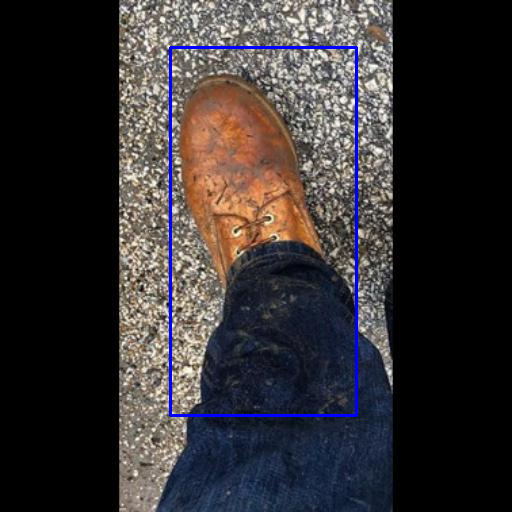

In [23]:
img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0), 2)
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
display(Image.fromarray(img))

In [39]:
# ymin=00
xmin,xmax,ymin,ymax

(0, 154, 0, 273)

In [108]:
y_sample=np.array(ysample)

In [96]:
for i in y_sample:
    for j in i:
        if j<0:
            print(j)

In [12]:
with open('x_sample.pkl', 'rb') as file:
    x_sample = pickle.load(file)
x_sample.shape

(11747, 224, 224, 3)

In [10]:
x_sample.shape

(11747, 224, 224, 3)

In [2]:
y_sample

array([[1.        , 0.        , 0.15039062, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.22851562, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.19921875, ..., 0.43457031, 0.3828125 ,
        0.86914062],
       ...,
       [1.        , 1.        , 0.06054688, ..., 0.13476562, 0.109375  ,
        0.26953125],
       [1.        , 1.        , 0.19335938, ..., 0.40136719, 0.37890625,
        0.80273438],
       [0.        , 1.        , 0.        , ..., 0.37695312, 0.31054688,
        0.75390625]])

In [3]:
x_sample

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [100]:
xc,yc,wid,hei=y_sample[0

(182, 79, 336, 352)

In [102]:
xmin=int((xc-(wid/2))*z)
xmax=int((xc+(wid/2))*z)
ymin=int((yc-(hei/2))*z)
ymax=int((yc+(hei/2))*z)

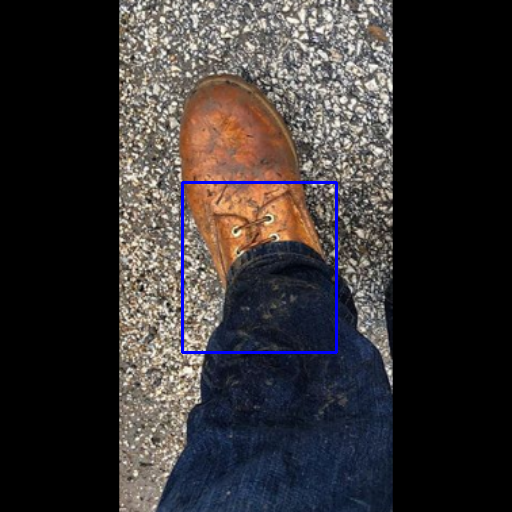

In [103]:
img=cv2.imread('/home/unreal/Desktop/foot/jpeg_images/0.png')
img = cv2.rectangle(img,(xmin,xmin),(xmax,ymax),(255,0,0), 2)
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
display(Image.fromarray(img))

In [104]:
xmin,ymin,xmax,ymax

(182, 79, 336, 352)

In [69]:
xc-(wid/2)

0.0

In [68]:
xc=

0

In [101]:
xc,yc,wid,hei

(0.505859375, 0.4208984375, 0.30078125, 0.533203125)

In [78]:
lr_df['lymax'][i]

79

In [97]:
lr_df['lymax'][i]-lr_df['lymax'][i]

0

In [112]:
y_sample.all()>0

False